In [1]:
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns

Загружаем данные с рейтингами IESE, с 2014 по 2019 гг.

In [2]:
rank_2014 = pd.read_excel('IESE_2014_City_Ranking.xlsx').filter(items =["Ranking 2014", 'City', 'Country', "CIMI 2014"])
rank_2015 = pd.read_excel('IESE_2015_City_Ranking.xlsx').filter(items =["Ranking 2015", 'City', 'Country', "CIMI 2015"])
rank_2016 = pd.read_excel('IESE_2016_City_Ranking.xlsx').filter(items =["Ranking 2016", 'City', 'Country', "CIMI 2016"])
rank_2017 = pd.read_excel('IESE_2017_City_Ranking.xlsx').filter(items =["Ranking 2017", 'City', 'Country', "CIMI 2017"])
rank_2018 = pd.read_excel('IESE_2018_City_Ranking.xlsx').filter(items =["Ranking 2018", 'City', 'Country', "CIMI 2018"])
rank_2019 = pd.read_excel('IESE_2019_City_Ranking.xlsx').filter(items =["Ranking 2019", 'City', 'Country', "CIMI 2019"])
rank_2019 # Выведено для проверки, что данные грузятся нормально

,Ranking 2019,City,Country,CIMI 2019
0,1,London,United Kingdom,100.00
1,2,New York City,United States,95.73
2,3,Paris,France,85.50
3,4,Tokyo,Japan,81.95
4,5,Reykjavik,Iceland,80.47
...,...,...,...,...
169,170,Douala,Cameroon,22.58
170,171,Lagos,Nigeria,18.13
171,172,Lahore,Pakistan,13.76
172,173,Karachi,Pakistan,10.39


При первоначальной загрузке данных была логическая ошибка. Были выбраны к загрузке только столбцы: город-рейтинг, оказалось, что в одной из таблиц два города Лондон (один в Англии, другой в Канаде). Перевыбраны столбцы: город-страна-рейтинг.
Далее оказалось, что были ошибки в названии стран (не все были идентичны). В исходных данных проверка/исправление в справочнике городов и стран.

In [3]:
rank_2015[rank_2015.City == 'London']

,Ranking 2015,City,Country,CIMI 2015
1,2,London,United Kingdom,99.65
36,37,London,Canada,77.32


In [4]:
rank_2015[rank_2015.City == 'New York City'][rank_2015.Country == 'United States']

<ipython-input-4-15d27a61ca71>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  rank_2015[rank_2015.City == 'New York City'][rank_2015.Country == 'United States']


,Ranking 2015,City,Country,CIMI 2015
0,1,New York City,United States,100.0


<AxesSubplot:title={'center':'CIMI 2014 distribution'}, ylabel='Frequency'>

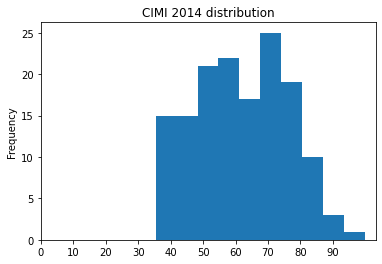

In [5]:
# Смотрим, как распределяются индексы в рейтингах
rank_2014['CIMI 2014'].plot(kind='hist', 
                     bins=10,
                     title='CIMI 2014 distribution',
                     #xlabel='CIMI',
                     #ylabel='',
                     xticks=range(0, 100, 10))

<AxesSubplot:title={'center':'CIMI 2017 distribution'}, ylabel='Frequency'>

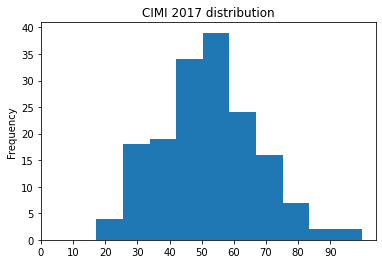

In [6]:
rank_2017['CIMI 2017'].plot(kind='hist', 
                     bins=10,
                     title='CIMI 2017 distribution',
                     #xlabel='CIMI',
                     #ylabel='',
                     xticks=range(0, 100, 10))

<AxesSubplot:title={'center':'CIMI 2019 distribution'}, ylabel='Frequency'>

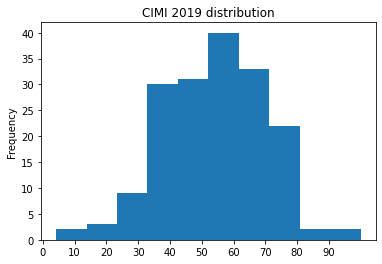

In [7]:
rank_2019['CIMI 2019'].plot(kind='hist', 
                     bins=10,
                     title='CIMI 2019 distribution',
                     #xlabel='CIMI',
                     #ylabel='',
                     xticks=range(0, 100, 10))
# Видно, что в 2014 г. нет аутсайдеров, большее количество в середнячках и выше.
# В 2017, 2019 гг. в рейтинге присутствуют города с низкими оценками. 
# Возможно, за счет того, что количество оценочных показателей стало больше, находятся города,
# которые хоть в чем-то могут отличиться и набрать баллы для итогового индекса.

Формируем таблицу из всех городов, которые попадали во все рейтинги - "узкий" список.

In [8]:
rank_2014_2019_inner = rank_2014.merge(rank_2015, how = 'inner', on = ['City', 'Country']).merge(rank_2016, 
                how = 'inner', on = ['City', 'Country']).merge(rank_2017, 
                how = 'inner', on = ['City', 'Country']).merge(rank_2018, 
                how = 'inner', on = ['City', 'Country']).merge(rank_2019, 
                how = 'inner', on = ['City', 'Country'])
rank_2014_2019_inner.sort_values(by='Ranking 2019', ascending=True)

,Ranking 2014,City,Country,CIMI 2014,Ranking 2015,CIMI 2015,Ranking 2016,CIMI 2016,Ranking 2017,CIMI 2017,Ranking 2018,CIMI 2018,Ranking 2019,CIMI 2019
0,1,London,United Kingdom,100.00,2,99.65,2,98.71,2,99.27,1,100.00,1,100.00
1,2,New York City,United States,92.24,1,100.00,1,100.00,1,100.00,2,94.63,2,95.73
3,4,Paris,France,87.69,3,92.89,3,91.97,3,90.20,4,86.23,3,85.50
6,7,Tokyo,Japan,84.15,12,85.12,8,84.85,4,84.38,6,84.11,4,81.95
14,15,Copenhagen,Denmark,80.48,11,86.00,27,77.56,13,74.55,8,81.80,6,78.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,127,Manila,Philippines,44.24,145,49.55,148,46.51,146,32.73,163,27.73,165,29.56
93,105,Riyadh,Saudi Arabia,51.91,123,55.78,138,48.32,153,29.13,164,27.71,167,29.34
113,137,Cairo,Egypt,40.77,156,45.47,163,42.30,157,27.24,165,26.74,168,26.89
118,148,Calcutta,India,35.35,179,37.67,178,34.54,163,21.14,169,19.54,169,26.35


In [9]:
# Формируем таблицу "узкого" списка только с рейтинговыми местами в каждом году
r1 = rank_2014_2019_inner.loc[:,['City', 'Country', 'Ranking 2014', 'Ranking 2015', 'Ranking 2016', 
                           'Ranking 2017', 'Ranking 2018', 'Ranking 2019']].sort_values(by='Ranking 2019', ascending=True)
r1

,City,Country,Ranking 2014,Ranking 2015,Ranking 2016,Ranking 2017,Ranking 2018,Ranking 2019
0,London,United Kingdom,1,2,2,2,1,1
1,New York City,United States,2,1,1,1,2,2
3,Paris,France,4,3,3,3,4,3
6,Tokyo,Japan,7,12,8,4,6,4
14,Copenhagen,Denmark,15,11,27,13,8,6
...,...,...,...,...,...,...,...,...
108,Manila,Philippines,127,145,148,146,163,165
93,Riyadh,Saudi Arabia,105,123,138,153,164,167
113,Cairo,Egypt,137,156,163,157,165,168
118,Calcutta,India,148,179,178,163,169,169


Добавим столбец со средним рейтингом за 6 лет. Посмотрим графически, что получается

In [10]:
r1['average_rating'] = r1[['Ranking 2014', 'Ranking 2015', 'Ranking 2016', 
                           'Ranking 2017', 'Ranking 2018', 'Ranking 2019']].mean(axis=1).round(2)
r1

,City,Country,Ranking 2014,Ranking 2015,Ranking 2016,Ranking 2017,Ranking 2018,Ranking 2019,average_rating
0,London,United Kingdom,1,2,2,2,1,1,1.50
1,New York City,United States,2,1,1,1,2,2,1.50
3,Paris,France,4,3,3,3,4,3,3.33
6,Tokyo,Japan,7,12,8,4,6,4,6.83
14,Copenhagen,Denmark,15,11,27,13,8,6,13.33
...,...,...,...,...,...,...,...,...,...
108,Manila,Philippines,127,145,148,146,163,165,149.00
93,Riyadh,Saudi Arabia,105,123,138,153,164,167,141.67
113,Cairo,Egypt,137,156,163,157,165,168,157.67
118,Calcutta,India,148,179,178,163,169,169,167.67


In [11]:
# Посмотрим разброс рейтингов - стандартное отклонение
r1['stdev_rating'] = np.std(r1[['Ranking 2014', 'Ranking 2015', 'Ranking 2016', 
                           'Ranking 2017', 'Ranking 2018', 'Ranking 2019']], axis=1).round(2)
r1

,City,Country,Ranking 2014,Ranking 2015,Ranking 2016,Ranking 2017,Ranking 2018,Ranking 2019,average_rating,stdev_rating
0,London,United Kingdom,1,2,2,2,1,1,1.50,0.50
1,New York City,United States,2,1,1,1,2,2,1.50,0.50
3,Paris,France,4,3,3,3,4,3,3.33,0.47
6,Tokyo,Japan,7,12,8,4,6,4,6.83,2.73
14,Copenhagen,Denmark,15,11,27,13,8,6,13.33,6.80
...,...,...,...,...,...,...,...,...,...,...
108,Manila,Philippines,127,145,148,146,163,165,149.00,12.66
93,Riyadh,Saudi Arabia,105,123,138,153,164,167,141.67,22.27
113,Cairo,Egypt,137,156,163,157,165,168,157.67,10.16
118,Calcutta,India,148,179,178,163,169,169,167.67,10.39


In [12]:
r1['stdev_rating'].mean()
# Получили среднее значение стандартных отклонений по "узкому" списку рейтингов

10.181344537815127

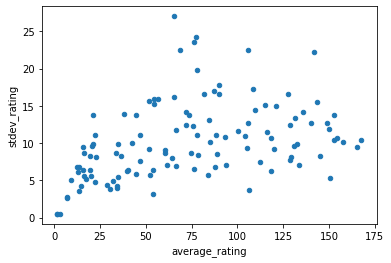

In [13]:
# Строим график рассеяния между средним и стандартным отклонением. 
# Разброс есть, то тенденции по увеличению разброса в зависимости от рейтинга нет (кроме топ-10)
r1.plot(kind='scatter', 
        x='average_rating', 
        y='stdev_rating' 
        )
plt.show()

<AxesSubplot:xlabel='stdev_rating', ylabel='Count'>

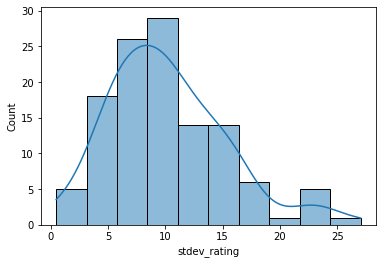

In [14]:
# График распределения стандартных отклонений - почти нормальный.
# r1['stdev_rating'].plot.hist()
sns.histplot(data=r1['stdev_rating'], kde=True)


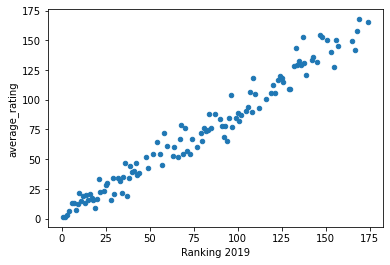

In [15]:
r1.plot(kind='scatter', 
        x='Ranking 2019', 
        y='average_rating' 
        )
plt.show()
#Кучность высокая - рейтинг 2019 г. примерно соответствует среднему рейтингу за 6 лет.

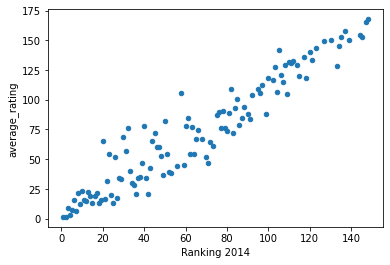

In [16]:
r1.plot(kind='scatter', 
        x='Ranking 2014', 
        y='average_rating' 
        )
plt.show()
#Не такая кучная распределенность. 
#Есть случаи, когда рейтинги 2014 г. сильно лучше (маленькие значения), чем средний рейтинг за 6 лет.

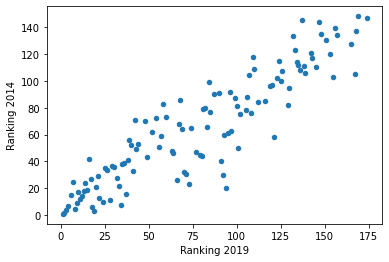

In [17]:
r1.plot(kind='scatter', 
        x='Ranking 2019', 
        y='Ranking 2014' 
        )
plt.show()
#Видно, что места в 2014 и в 2019 гг. могут существенно отличаться. 
#В первых 15 местах разброса почти нет - те же самые лидеры.

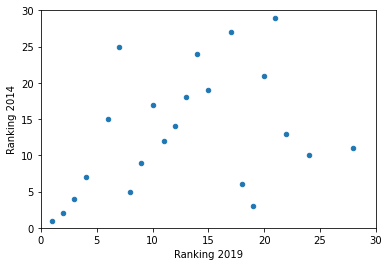

In [18]:
r1.plot(kind='scatter', 
        x='Ranking 2019', 
        y='Ranking 2014' 
        )
#x1,x2,y1,y2 = plt.axis()
plt.axis((0,30,0,30))
plt.show()

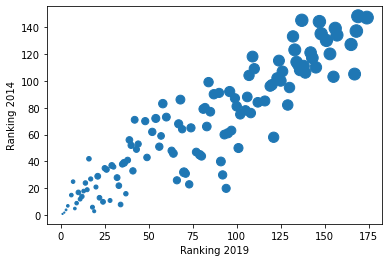

In [19]:
dimension = r1['average_rating']
r1.plot(kind='scatter', 
        x='Ranking 2019', 
        y='Ranking 2014', 
        s = dimension)
plt.show()

Формируем "узкую" таблицу с индексами CIMI, выводим средний индекс за все годы

In [20]:
r2 = rank_2014_2019_inner.loc[:,['City', 'Country', 'CIMI 2014', 'CIMI 2015', 'CIMI 2016', 
                           'CIMI 2017', 'CIMI 2018', 'CIMI 2019']].sort_values(by='CIMI 2019', ascending=False)
r2

,City,Country,CIMI 2014,CIMI 2015,CIMI 2016,CIMI 2017,CIMI 2018,CIMI 2019
0,London,United Kingdom,100.00,99.65,98.71,99.27,100.00,100.00
1,New York City,United States,92.24,100.00,100.00,100.00,94.63,95.73
3,Paris,France,87.69,92.89,91.97,90.20,86.23,85.50
6,Tokyo,Japan,84.15,85.12,84.85,84.38,84.11,81.95
14,Copenhagen,Denmark,80.48,86.00,77.56,74.55,81.80,78.51
...,...,...,...,...,...,...,...,...
108,Manila,Philippines,44.24,49.55,46.51,32.73,27.73,29.56
93,Riyadh,Saudi Arabia,51.91,55.78,48.32,29.13,27.71,29.34
113,Cairo,Egypt,40.77,45.47,42.30,27.24,26.74,26.89
118,Calcutta,India,35.35,37.67,34.54,21.14,19.54,26.35


In [21]:
r2['average_CIMI'] = r2[['CIMI 2014', 'CIMI 2015', 'CIMI 2016', 
                           'CIMI 2017', 'CIMI 2018', 'CIMI 2019']].mean(axis=1).round(2)
r2_sorted_by_ave_CIMI = r2.sort_values(by='average_CIMI', ascending=False)
r2_sorted_by_ave_CIMI

,City,Country,CIMI 2014,CIMI 2015,CIMI 2016,CIMI 2017,CIMI 2018,CIMI 2019,average_CIMI
0,London,United Kingdom,100.00,99.65,98.71,99.27,100.00,100.00,99.60
1,New York City,United States,92.24,100.00,100.00,100.00,94.63,95.73,97.10
3,Paris,France,87.69,92.89,91.97,90.20,86.23,85.50,89.08
6,Tokyo,Japan,84.15,85.12,84.85,84.38,84.11,81.95,84.09
4,Amsterdam,Netherlands,85.05,90.32,82.86,77.44,86.70,77.31,83.28
...,...,...,...,...,...,...,...,...,...
116,Santo Domingo,Dominican Republic,36.58,39.88,40.34,29.10,37.43,40.39,37.29
115,La Paz,Bolivia,36.93,41.67,39.25,30.08,35.12,35.88,36.49
113,Cairo,Egypt,40.77,45.47,42.30,27.24,26.74,26.89,34.90
118,Calcutta,India,35.35,37.67,34.54,21.14,19.54,26.35,29.10


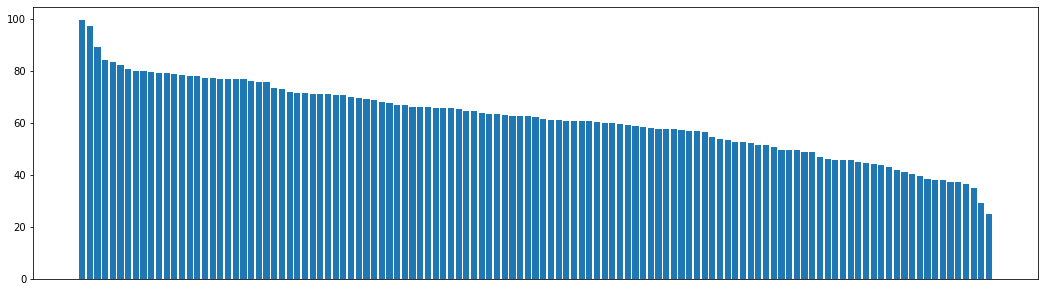

In [22]:
x = r2_sorted_by_ave_CIMI['City'] 
y = r2_sorted_by_ave_CIMI['average_CIMI'] 
# plt.bar(x, y)
        
# height=100, width=0.8, bottom=None, align='center', data=None)
fig, ax = plt.subplots()
ax.bar(x, y)
ax.set_xticks([])
# ax.set_facecolor('seashell')
# fig.set_facecolor('floralwhite')
fig.set_figwidth(18)    #  ширина Figure
fig.set_figheight(5)    #  высота Figure

plt.show()

In [23]:
# Отбираем топ-20 городов по среднему значение индекса за 6 лет из "узкого" списка. 
# Затем покажем графически индексы 2014, 2017 и 2019 гг.
r2_20 = r2_sorted_by_ave_CIMI.iloc[:20]
r2_20

,City,Country,CIMI 2014,CIMI 2015,CIMI 2016,CIMI 2017,CIMI 2018,CIMI 2019,average_CIMI
0,London,United Kingdom,100.00,99.65,98.71,99.27,100.00,100.00,99.60
1,New York City,United States,92.24,100.00,100.00,100.00,94.63,95.73,97.10
3,Paris,France,87.69,92.89,91.97,90.20,86.23,85.50,89.08
6,Tokyo,Japan,84.15,85.12,84.85,84.38,84.11,81.95,84.09
4,Amsterdam,Netherlands,85.05,90.32,82.86,77.44,86.70,77.31,83.28
2,Seoul,South Korea,88.47,89.60,84.91,79.21,78.13,73.67,82.33
8,Singapore,Singapore,83.37,82.80,79.22,79.52,82.73,76.71,80.73
24,Berlin,Germany,78.06,84.72,83.40,76.34,80.88,77.46,80.14
14,Copenhagen,Denmark,80.48,86.00,77.56,74.55,81.80,78.51,79.82
17,Chicago,United States,80.24,90.23,82.55,73.55,75.55,75.04,79.53


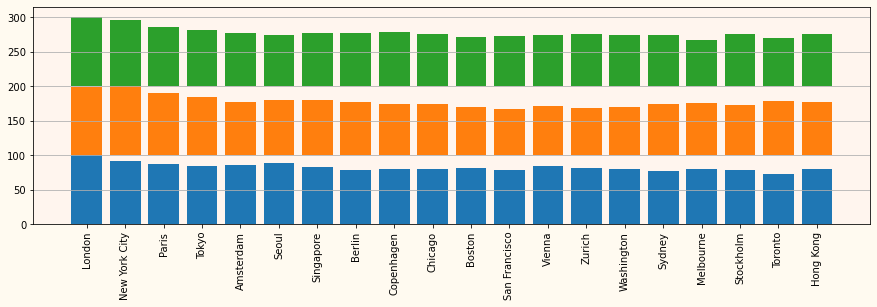

In [24]:
x = r2_20['City']
y1 = r2_20['CIMI 2014']
y2 = r2_20['CIMI 2017']
y3 = r2_20['CIMI 2019']

fig, ax = plt.subplots()

ax.bar(x, y1)
ax.bar(x, y2, bottom = 100)
ax.bar(x, y3, bottom = 200)

fig.set_figwidth(15)    #  ширина и
fig.set_figheight(4)    #  высота "Figure"
fig.set_facecolor('floralwhite')
ax.set_facecolor('seashell')

plt.xticks(rotation=90) #разворачивает надписи на оси х
ax.grid(axis = 'y')

plt.show()

Объединим средние значения рейтингов и средние индексы CIMI, сделаем корреляцию и диаграмму рассеяния

In [25]:
r1_2 = r1.merge(r2, how = 'inner', on = ['City', 'Country']) # Объединенная таблица рейтингов, индексов за 6 лет и в среднем
r1_2.loc[:,['City', 'Country', 'average_rating', 'average_CIMI']]

,City,Country,average_rating,average_CIMI
0,London,United Kingdom,1.50,99.60
1,New York City,United States,1.50,97.10
2,Paris,France,3.33,89.08
3,Tokyo,Japan,6.83,84.09
4,Copenhagen,Denmark,13.33,79.82
...,...,...,...,...
114,Manila,Philippines,149.00,38.39
115,Riyadh,Saudi Arabia,141.67,40.36
116,Cairo,Egypt,157.67,34.90
117,Calcutta,India,167.67,29.10


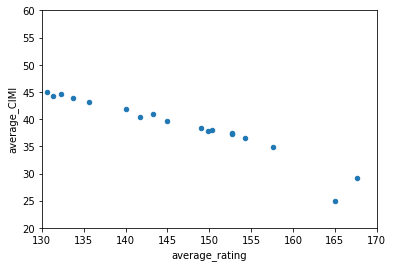

In [26]:
r1_2.plot(kind='scatter', 
        x='average_rating', 
        y='average_CIMI' 
        )
x1,x2,y1,y2 = plt.axis()
# plt.axis((0,30,70,100)) #График нелинейный. У топ-30 изменение индекса значительное (более 25).
# plt.axis((30,80,30,80)) #График линейный. В участниках с 30 по 80 места небольшое изменение по индексу (около 10) - середнячки.
# plt.axis((80,130,20,70)) #График линейный. В участниках с 80 по 130 места изм-е по индексу около 15, небольшое, но выше, чем в середнячках.
plt.axis((130,170,20,60)) #График почти линейный, переходящий в конце на боле высокий темп падения. Т.е. есть аутсайдеры.
plt.show()

In [27]:
performance_title = pd.read_excel('IESE_Performance_Title.xlsx')
performance_title

,Performance Title,Performance Index,Score min,Score max
0,High,H,91,100
1,Relatively High,RH,61,90
2,Medium,M,46,60
3,Low,L,16,45
4,Very Low,VL,1,15


In [28]:
# Функция определяет, к какой категории "хорошего" индекса отнести город.
def perf(row):
    if (row['average_CIMI'] > 90):
        return 'High'
    elif (row['average_CIMI'] > 60):
        return 'Relatively High'
    elif (row['average_CIMI'] > 45):
        return 'Medium'
    elif (row['average_CIMI'] > 15):
        return 'Low'
    else: 
        return 'Very Low'

In [29]:
# Добавляем категорию "хорошего" индекса в "узком" списке
r1_2['performance'] = r1_2.apply(perf, axis=1)
r1_2.head(20)

,City,Country,Ranking 2014,Ranking 2015,Ranking 2016,Ranking 2017,Ranking 2018,Ranking 2019,average_rating,stdev_rating,CIMI 2014,CIMI 2015,CIMI 2016,CIMI 2017,CIMI 2018,CIMI 2019,average_CIMI,performance
0,London,United Kingdom,1,2,2,2,1,1,1.50,0.50,100.00,99.65,98.71,99.27,100.00,100.00,99.60,High
1,New York City,United States,2,1,1,1,2,2,1.50,0.50,92.24,100.00,100.00,100.00,94.63,95.73,97.10,High
2,Paris,France,4,3,3,3,4,3,3.33,0.47,87.69,92.89,91.97,90.20,86.23,85.50,89.08,Relatively High
3,Tokyo,Japan,7,12,8,4,6,4,6.83,2.73,84.15,85.12,84.85,84.38,84.11,81.95,84.09,Relatively High
4,Copenhagen,Denmark,15,11,27,13,8,6,13.33,6.80,80.48,86.00,77.56,74.55,81.80,78.51,79.82,Relatively High
5,Berlin,Germany,25,16,9,11,9,7,12.83,6.12,78.06,84.72,83.40,76.34,80.88,77.46,80.14,Relatively High
6,Amsterdam,Netherlands,5,6,10,10,3,8,7.00,2.58,85.05,90.32,82.86,77.44,86.70,77.31,83.28,Relatively High
7,Singapore,Singapore,9,22,22,6,7,9,12.50,6.80,83.37,82.80,79.22,79.52,82.73,76.71,80.73,Relatively High
8,Hong Kong,China,17,39,42,9,11,10,21.33,13.82,80.40,77.20,71.69,77.48,78.76,76.04,76.93,Relatively High
9,Zurich,Switzerland,12,14,13,24,15,11,14.83,4.30,81.43,85.11,82.51,68.04,76.66,75.96,78.28,Relatively High


In [30]:
# Оставляем только город, страну и категорию рейтинга в "узком" списке
r1_2_perf = pd.concat([r1_2['City'], r1_2['Country'], pd.Series(r1_2.apply(perf, axis=1), name = 'performance')], axis=1)
r1_2_perf.head(10)

,City,Country,performance
0,London,United Kingdom,High
1,New York City,United States,High
2,Paris,France,Relatively High
3,Tokyo,Japan,Relatively High
4,Copenhagen,Denmark,Relatively High
5,Berlin,Germany,Relatively High
6,Amsterdam,Netherlands,Relatively High
7,Singapore,Singapore,Relatively High
8,Hong Kong,China,Relatively High
9,Zurich,Switzerland,Relatively High


In [31]:
r1_2_perf_count = r1_2_perf['performance'].value_counts()
# r1_2_perf_count['2'] = r1_2_perf['performance'].value_counts(normalize=True) Показывает доли значений по категориям.
r1_2_perf_count

Relatively High    68
Medium             31
Low                18
High                2
Name: performance, dtype: int64

<AxesSubplot:ylabel='performance'>

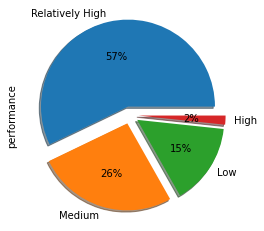

In [32]:
r1_2_perf_count.plot(kind='pie', autopct='%1.0f%%', shadow=True, explode=(0.1, 0.1, 0.1, 0.1))

Формируем "широкий" список - все города, попадавшие в рейтинг за шесть лет.

In [33]:
rank_2014_2019_outer = rank_2014.merge(rank_2015, how = 'outer', on = ['City', 'Country']).merge(rank_2016, 
                how = 'outer', on = ['City', 'Country']).merge(rank_2017, 
                how = 'outer', on = ['City', 'Country']).merge(rank_2018, 
                how = 'outer', on = ['City', 'Country']).merge(rank_2019, 
                how = 'outer', on = ['City', 'Country'])
rank_2014_2019_outer.loc[:,['City', 'Country', 'Ranking 2014', 'Ranking 2015', 'Ranking 2016', 
                           'Ranking 2017', 'Ranking 2018', 'Ranking 2019']].sort_values(by='Ranking 2019', ascending=True)

,City,Country,Ranking 2014,Ranking 2015,Ranking 2016,Ranking 2017,Ranking 2018,Ranking 2019
0,London,United Kingdom,1.0,2.0,2.0,2.0,1.0,1.0
1,New York City,United States,2.0,1.0,1.0,1.0,2.0,2.0
3,Paris,France,4.0,3.0,3.0,3.0,4.0,3.0
6,Tokyo,Japan,7.0,12.0,8.0,4.0,6.0,4.0
184,Reykjavik,Iceland,NaN,NaN,NaN,5.0,5.0,5.0
...,...,...,...,...,...,...,...,...
169,Skopje,Macedonia,NaN,146.0,142.0,125.0,NaN,NaN
177,Bombay,India,NaN,167.0,NaN,NaN,NaN,NaN
180,Tehran,Iran,NaN,177.0,161.0,NaN,NaN,NaN
194,Valladolid,Spain,NaN,NaN,NaN,99.0,NaN,NaN


Вариант 1 получения среднего места и среднего рейтинга по "широкому" списку. 
Будем присваивать вместо NaN макс. рейтинг года+1, далее считать средний рейтинг на расширенную выборку и смотреть разбросы между годами и между средним рейтингом.

In [34]:
# rank_2014_2019_outer['Ranking 2014'].fillna(np.max(rank_2014_2019_outer['Ranking 2014']) + 1, inplace = True)
# rank_2014_2019_outer['Ranking 2015'].fillna(np.max(rank_2014_2019_outer['Ranking 2015']) + 1, inplace = True)
# rank_2014_2019_outer['Ranking 2016'].fillna(np.max(rank_2014_2019_outer['Ranking 2016']) + 1, inplace = True)
# rank_2014_2019_outer['Ranking 2017'].fillna(np.max(rank_2014_2019_outer['Ranking 2017']) + 1, inplace = True)
# rank_2014_2019_outer['Ranking 2018'].fillna(np.max(rank_2014_2019_outer['Ranking 2018']) + 1, inplace = True)
# rank_2014_2019_outer['Ranking 2019'].fillna(np.max(rank_2014_2019_outer['Ranking 2019']) + 1, inplace = True)
# Если поставить inplace = True, то перезапишется сразу исходный датафрейм. Мне так не надо.
r1_outer = rank_2014_2019_outer.loc[:,['City', 'Country']]
r1_outer['Ranking 2014'] = rank_2014_2019_outer['Ranking 2014'].fillna(np.max(rank_2014_2019_outer['Ranking 2014']) + 1, inplace = False)
r1_outer['Ranking 2015'] = rank_2014_2019_outer['Ranking 2015'].fillna(np.max(rank_2014_2019_outer['Ranking 2015']) + 1, inplace = False)
r1_outer['Ranking 2016'] = rank_2014_2019_outer['Ranking 2016'].fillna(np.max(rank_2014_2019_outer['Ranking 2016']) + 1, inplace = False)
r1_outer['Ranking 2017'] = rank_2014_2019_outer['Ranking 2017'].fillna(np.max(rank_2014_2019_outer['Ranking 2017']) + 1, inplace = False)
r1_outer['Ranking 2018'] = rank_2014_2019_outer['Ranking 2018'].fillna(np.max(rank_2014_2019_outer['Ranking 2018']) + 1, inplace = False)
r1_outer['Ranking 2019'] = rank_2014_2019_outer['Ranking 2019'].fillna(np.max(rank_2014_2019_outer['Ranking 2019']) + 1, inplace = False)
r1_outer['average_rating_extra'] = r1_outer[['Ranking 2014', 'Ranking 2015', 'Ranking 2016', 
                            'Ranking 2017', 'Ranking 2018', 'Ranking 2019']].mean(axis=1).round(2)
r1_outer['rank_extra'] = r1_outer['average_rating_extra'].rank(method = 'first')
r1_outer.sort_values(by='rank_extra', ascending=True).iloc[50:70]

,City,Country,Ranking 2014,Ranking 2015,Ranking 2016,Ranking 2017,Ranking 2018,Ranking 2019,average_rating_extra,rank_extra
45,Osaka,Japan,46.0,56.0,72.0,56.0,68.0,64.0,60.33,51.0
46,Eindhoven,Netherlands,47.0,59.0,58.0,65.0,57.0,77.0,60.50,52.0
72,Valencia,Spain,73.0,49.0,63.0,63.0,61.0,60.0,61.50,53.0
71,Warsaw,Poland,72.0,74.0,54.0,64.0,69.0,54.0,64.50,54.0
19,Liverpool,United Kingdom,20.0,48.0,55.0,82.0,94.0,94.0,65.50,55.0
43,Linz,Austria,44.0,63.0,46.0,73.0,87.0,80.0,65.50,56.0
148,Baltimore,United States,149.0,18.0,20.0,77.0,71.0,61.0,66.00,57.0
64,Budapest,Hungary,65.0,68.0,67.0,53.0,73.0,74.0,66.67,58.0
67,Rome,Italy,68.0,81.0,43.0,66.0,75.0,67.0,66.67,59.0
29,Dubai,United Arab Emirates,30.0,65.0,66.0,60.0,99.0,92.0,68.67,60.0


In [35]:
# Посмотрим разброс рейтингов - стандартное отклонение
r1_outer['stdev_rating_extra'] = np.std(r1_outer[['Ranking 2014', 'Ranking 2015', 'Ranking 2016', 
                           'Ranking 2017', 'Ranking 2018', 'Ranking 2019']], axis=1).round(2)
r1_outer

,City,Country,Ranking 2014,Ranking 2015,Ranking 2016,Ranking 2017,Ranking 2018,Ranking 2019,average_rating_extra,rank_extra,stdev_rating_extra
0,London,United Kingdom,1.0,2.0,2.0,2.0,1.0,1.0,1.50,1.0,0.50
1,New York City,United States,2.0,1.0,1.0,1.0,2.0,2.0,1.50,2.0,0.50
2,Seoul,South Korea,3.0,8.0,7.0,7.0,12.0,19.0,9.33,6.0,5.06
3,Paris,France,4.0,3.0,3.0,3.0,4.0,3.0,3.33,3.0,0.47
4,Amsterdam,Netherlands,5.0,6.0,10.0,10.0,3.0,8.0,7.00,5.0,2.58
...,...,...,...,...,...,...,...,...,...,...,...
201,Seattle,United States,149.0,182.0,181.0,166.0,58.0,53.0,131.50,135.0,54.87
202,Quebec City,Canada,149.0,182.0,181.0,166.0,67.0,89.0,139.00,147.0,44.96
203,Asuncion,Paraguay,149.0,182.0,181.0,166.0,141.0,131.0,158.33,182.0,19.44
204,Skopje,North Macedonia,149.0,182.0,181.0,166.0,149.0,141.0,161.33,190.0,16.09


In [36]:
r1_outer['stdev_rating_extra'].mean()
# Получили среднее значение стандартных отклонений по "широкому" списку рейтингов

17.37271844660194

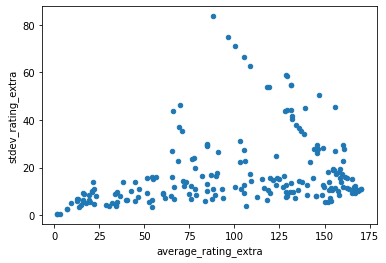

In [37]:
# Строим график рассеяния между средним и стандартным отклонением. 
# Появляется большой разброс для рейтиноговых с 70 до 155, остальное - нормально
r1_outer.plot(kind='scatter', 
        x='average_rating_extra', 
        y='stdev_rating_extra' 
        )
plt.show()

<AxesSubplot:xlabel='stdev_rating_extra', ylabel='Count'>

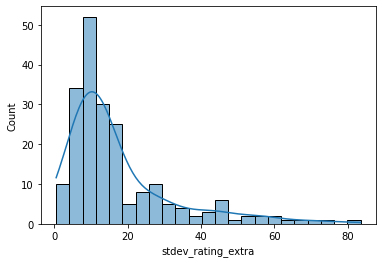

In [38]:
# График распределения стандартных отклонений - НЕ нормальный.
# r1['stdev_rating'].plot.hist()
sns.histplot(data=r1_outer['stdev_rating_extra'], kde=True)

In [39]:
# Добавляем ранжирование "узкого" списка. r1 - несортированный список
r1['rank'] = r1['average_rating'].rank(method = 'first')
r1['avg_rating-rank'] = r1['average_rating']-r1['rank']
r1_sorted_by_rank = r1.sort_values(by='rank', ascending = True)
r1_sorted_by_rank.iloc[42:82]
# Смотрим на разные зоны по местам - где начинается сильное отставание

,City,Country,Ranking 2014,Ranking 2015,Ranking 2016,Ranking 2017,Ranking 2018,Ranking 2019,average_rating,stdev_rating,rank,avg_rating-rank
25,Glasgow,United Kingdom,26,46,39,68,64,66,51.50,15.68,43.0,8.50
64,Miami,United States,70,53,48,51,40,48,51.67,9.14,44.0,7.67
47,Stuttgart,Germany,48,51,45,55,53,63,52.50,5.71,45.0,7.50
58,Lisbon,Portugal,62,62,52,52,44,52,54.00,6.32,46.0,8.00
50,Cologne,Germany,51,52,60,54,51,56,54.00,3.21,47.0,7.00
22,Birmingham,United Kingdom,23,47,62,58,63,73,54.33,15.98,48.0,6.33
60,Phoenix,United States,64,40,37,75,42,69,54.50,15.24,49.0,5.50
30,Manchester,United Kingdom,31,43,57,59,78,71,56.50,15.87,50.0,6.50
45,Osaka,Japan,46,56,72,56,68,64,60.33,8.67,51.0,9.33
46,Eindhoven,Netherlands,47,59,58,65,57,77,60.50,9.09,52.0,8.50


In [40]:
r1_sorted_by_rank['avg_rating-rank'].iloc[0:42].agg(['mean', 'max'])

mean    2.519048
max     5.670000
Name: avg_rating-rank, dtype: float64

In [41]:
r1_sorted_by_rank['avg_rating-rank'].iloc[42:82].agg(['mean', 'min', 'max'])

mean     9.8415
min      5.5000
max     12.3300
Name: avg_rating-rank, dtype: float64

In [42]:
r1['avg_rating-rank'].iloc[82:119].agg(['mean', 'max'])

mean    28.702973
max     48.670000
Name: avg_rating-rank, dtype: float64

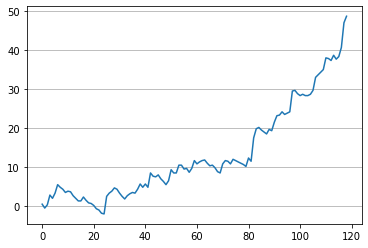

In [43]:
y=r1_sorted_by_rank['avg_rating-rank']
x=np.arange(len(y))
plt.plot(x,y)
plt.grid(axis = 'y')
# Показывает, что отклонения в топ-42 cтабильны (mean 2.519048, max 5.670000) - лидеры есть в рейтингах всех лет,
# место лидеров по годам может колебаться, но в рейтинге по среднему месту они остаются примерно той же позиции/месте.
# В списке от 42 до 82 места по рангу среднего места, отклонения ранга от среднего места в среднем 10, 
# т.е. 1) либо эти города могут сильно сдавать свои позиции в отдельные годы, 
# 2) либо в отдельные годы их оттестяли другие города, которые участвовали не во всех рейтингах (похоже, это чаще встречается)

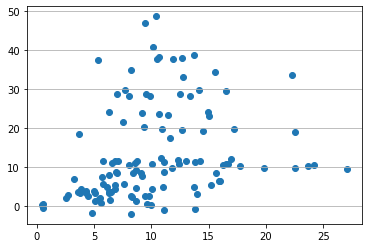

In [44]:
y=r1_sorted_by_rank['avg_rating-rank']
x_s=r1_sorted_by_rank['stdev_rating']
plt.scatter(x_s,y)
plt.grid(axis = 'y')
# Показывает, что нет связи между станд. отклонением мест по годам и 
# "разбегом" между рангом по среднему месту и средним местом за 6 лет
# Т.е. имеют место оба случая 1 и 2 описанных выше (за счет колебания мест и за счет новых участников)

In [45]:
r1_sorted_by_rank[['stdev_rating', 'avg_rating-rank']].corr()
# Нет корреляции (см. выше)

,stdev_rating,avg_rating-rank
stdev_rating,1.000000,0.276778
avg_rating-rank,0.276778,1.000000


In [46]:
# Объединяем "узкий" и "широкий" рейтинги
rank_matching_1 = r1.merge(r1_outer, how = 'inner', on = ['City', 'Country'])
rank_matching_1.loc[:,['City', 'Country', 'rank', 
                     'rank_extra']].sort_values(by='rank_extra', ascending=True)

,City,Country,rank,rank_extra
0,London,United Kingdom,1.0,1.0
1,New York City,United States,2.0,2.0
2,Paris,France,3.0,3.0
3,Tokyo,Japan,4.0,4.0
6,Amsterdam,Netherlands,5.0,5.0
...,...,...,...,...
101,Santo Domingo,Dominican Republic,114.0,167.0
107,La Paz,Bolivia,116.0,171.0
116,Cairo,Egypt,117.0,179.0
118,Caracas,Venezuela,118.0,195.0


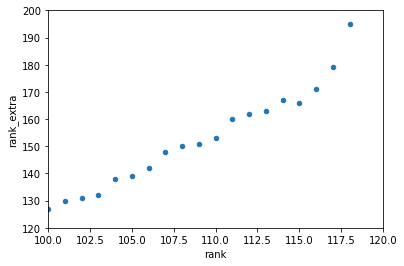

In [47]:
rank_matching_1.plot(kind='scatter', 
        x='rank', 
        y='rank_extra' 
        )
x1,x2,y1,y2 = plt.axis()
# plt.axis((0,50,0,50)) # Топ-50 городов попадали в рейтинги во все годы
# plt.axis((50,80,50,90)) # Тут уже попадаются города, которых не было в некоторых рейтингах, но при этом, они сохраняют довольно высокую позицию в расширенном рейтинге
# plt.axis((80,100,80,130)) # Таких городов все больше, т.е. мы допускаем к рассмотрению все города, которые хотя бы когда-то участвовали. 
plt.axis((100,120,120,200)) # Ценность места 90-110 в узком рейтинге такая же, как места 120-200 в широком рейтинге. 
# Дополнительные участники попадали во все зоны мест, причем больше во вторую половину, за счет этого отрыв в порядковом номере рейтинга все больше увеличивался по мере приближения к концу списка.
plt.show()

Посмотрим, на сколько отличаются рейтинговые места для узкого и широкого списка

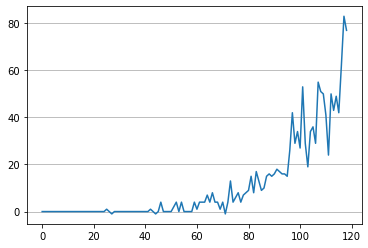

In [48]:
rank_matching_1['rank_difference'] = rank_matching_1['rank_extra'] - rank_matching_1['rank']
rank_matching_1['rank_difference'].plot()
plt.grid(axis = 'y')
# Выше сравнивала разницу между средним местом за шесть лет и рейтингом по "узкому" списку
# Здесь сравниваю разницу между рейтингами по "широкому" и "узкому" списку. 
# Здесь картина такая же - первые 40 позиций практически не меняют своих мест, 
# с 40 по 70 увеличивают место не более чем на 10 позиций,
# с 70 по 100 позиции прирост места растет до 20 позиций,
# далее видно, что стабильные участники из нижней части "узкого" списка на самом

<AxesSubplot:xlabel='rank', ylabel='rank_difference'>

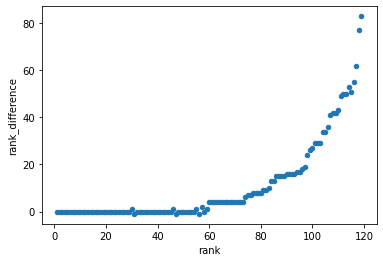

In [49]:
rank_matching_1.plot(kind='scatter', 
        x='rank', 
        y='rank_difference' 
        )

<AxesSubplot:xlabel='rank_extra', ylabel='rank_difference'>

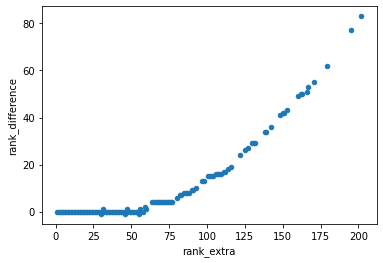

In [50]:
rank_matching_1.plot(kind='scatter', 
        x='rank_extra', 
        y='rank_difference' 
        )

Нужно попробовать 2 вариант усреднения места в "широком" списке, как место в рейтинге равно среднему месту только за те годы, в которых участвовал город, без присвоения штрафов. Т.е. если участвовал в трех рейтингах, то среднее по трем значениям.

In [51]:
rank_2014_2019_outer

,Ranking 2014,City,Country,CIMI 2014,Ranking 2015,CIMI 2015,Ranking 2016,CIMI 2016,Ranking 2017,CIMI 2017,Ranking 2018,CIMI 2018,Ranking 2019,CIMI 2019
0,1.0,London,United Kingdom,100.00,2.0,99.65,2.0,98.71,2.0,99.27,1.0,100.00,1.0,100.00
1,2.0,New York City,United States,92.24,1.0,100.00,1.0,100.00,1.0,100.00,2.0,94.63,2.0,95.73
2,3.0,Seoul,South Korea,88.47,8.0,89.60,7.0,84.91,7.0,79.21,12.0,78.13,19.0,73.67
3,4.0,Paris,France,87.69,3.0,92.89,3.0,91.97,3.0,90.20,4.0,86.23,3.0,85.50
4,5.0,Amsterdam,Netherlands,85.05,6.0,90.32,10.0,82.86,10.0,77.44,3.0,86.70,8.0,77.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,NaN,Seattle,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.0,61.96,53.0,63.32
202,NaN,Quebec City,Canada,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67.0,60.64,89.0,54.90
203,NaN,Asuncion,Paraguay,NaN,NaN,NaN,NaN,NaN,NaN,NaN,141.0,37.25,131.0,42.34
204,NaN,Skopje,North Macedonia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,149.0,33.88,141.0,38.15


In [52]:
r2_outer = rank_2014_2019_outer.loc[:,['City', 'Country']]
r2_outer['Ranking 2014'] = rank_2014_2019_outer['Ranking 2014'].fillna(0, inplace = False)
r2_outer['Ranking 2015'] = rank_2014_2019_outer['Ranking 2015'].fillna(0, inplace = False)
r2_outer['Ranking 2016'] = rank_2014_2019_outer['Ranking 2016'].fillna(0, inplace = False)
r2_outer['Ranking 2017'] = rank_2014_2019_outer['Ranking 2017'].fillna(0, inplace = False)
r2_outer['Ranking 2018'] = rank_2014_2019_outer['Ranking 2018'].fillna(0, inplace = False)
r2_outer['Ranking 2019'] = rank_2014_2019_outer['Ranking 2019'].fillna(0, inplace = False)
r2_outer['average_rating_notNone'] = r2_outer[['Ranking 2014', 'Ranking 2015', 'Ranking 2016', 
                           'Ranking 2017', 'Ranking 2018', 'Ranking 2019']].sum(
                            axis=1)/(np.count_nonzero(r2_outer, axis=1)-2).round(1) # Не получилось округлить
r2_outer['rank_notNone'] = r2_outer['average_rating_notNone'].rank(method = 'first')
r2_outer.sort_values(by='rank_notNone', ascending=True).iloc[20:40]
# Вывели рейтинг №2 "широкого" списка

,City,Country,Ranking 2014,Ranking 2015,Ranking 2016,Ranking 2017,Ranking 2018,Ranking 2019,average_rating_notNone,rank_notNone
41,Los Angeles,United States,42.0,15.0,18.0,17.0,16.0,16.0,20.666667,21.0
35,Toronto,Canada,36.0,24.0,11.0,8.0,18.0,30.0,21.166667,22.0
16,Hong Kong,China,17.0,39.0,42.0,9.0,11.0,10.0,21.333333,23.0
7,Geneva,Switzerland,8.0,9.0,17.0,32.0,32.0,34.0,22.000000,24.0
12,Helsinki,Finland,13.0,25.0,29.0,22.0,22.0,22.0,22.166667,25.0
185,Wellington,New Zealand,0.0,0.0,0.0,18.0,26.0,23.0,22.333333,26.0
9,Munich,Germany,10.0,21.0,19.0,37.0,27.0,24.0,23.000000,27.0
34,Madrid,Spain,35.0,34.0,28.0,25.0,24.0,25.0,28.500000,28.0
33,Barcelona,Spain,34.0,33.0,35.0,26.0,28.0,26.0,30.333333,29.0
186,Bern,Switzerland,0.0,0.0,0.0,29.0,31.0,31.0,30.333333,30.0


In [53]:
# Снова посмотрим разброс рейтингов - стандартное отклонение
r2_outer['stdev_rating_notNone'] = np.std(r2_outer[['Ranking 2014', 'Ranking 2015', 'Ranking 2016', 
                           'Ranking 2017', 'Ranking 2018', 'Ranking 2019']], axis=1).round(2)
r2_outer

,City,Country,Ranking 2014,Ranking 2015,Ranking 2016,Ranking 2017,Ranking 2018,Ranking 2019,average_rating_notNone,rank_notNone,stdev_rating_notNone
0,London,United Kingdom,1.0,2.0,2.0,2.0,1.0,1.0,1.500000,1.0,0.50
1,New York City,United States,2.0,1.0,1.0,1.0,2.0,2.0,1.500000,2.0,0.50
2,Seoul,South Korea,3.0,8.0,7.0,7.0,12.0,19.0,9.333333,7.0,5.06
3,Paris,France,4.0,3.0,3.0,3.0,4.0,3.0,3.333333,3.0,0.47
4,Amsterdam,Netherlands,5.0,6.0,10.0,10.0,3.0,8.0,7.000000,6.0,2.58
...,...,...,...,...,...,...,...,...,...,...,...
201,Seattle,United States,0.0,0.0,0.0,0.0,58.0,53.0,55.500000,64.0,26.20
202,Quebec City,Canada,0.0,0.0,0.0,0.0,67.0,89.0,78.000000,90.0,37.31
203,Asuncion,Paraguay,0.0,0.0,0.0,0.0,141.0,131.0,136.000000,159.0,64.18
204,Skopje,North Macedonia,0.0,0.0,0.0,0.0,149.0,141.0,145.000000,173.0,68.39


In [54]:
r2_outer['stdev_rating_notNone'].mean()
# Получили среднее значение стандартных отклонений по "широкому" списку №2 рейтингов. 
# Здесь станд. отклонение учитывает нулевые значения, а значит сильно увеличивается размах отклонений.
# В широком списке №1 в усреднении участвовали последнее +1 места, в широком списке №2 - нулевые места. 
# Нулевого места в принципе не может быть, так что показатель станд. отклонения пользоваться для сравнения списков не будем.

26.9681067961165

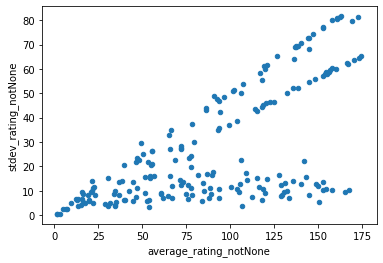

In [55]:
# Строим график рассеяния между средним и стандартным отклонением для широкого списка №2
r2_outer.plot(kind='scatter', 
        x='average_rating_notNone', 
        y='stdev_rating_notNone' 
        )
plt.show()

<AxesSubplot:xlabel='stdev_rating_notNone', ylabel='Count'>

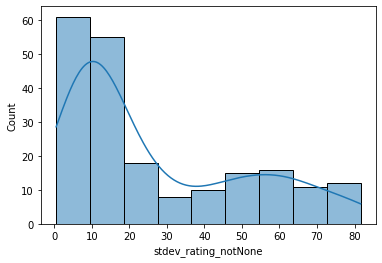

In [56]:
# График распределения стандартных отклонений - НЕ нормальный. 
# Первые два значения станд. отклонений 0-10, 10-20 встречаются чаще и в сумме дают примерно 119 значений узкого списка.
# В узком списке 90% станд. отклонений укладывались в 20.
# Про частоту остальных значений станд. отклонений (больше 20) можно сказать, что их распределение случайно.
sns.histplot(data=r2_outer['stdev_rating_notNone'], kde=True)

Объединим из трех таблиц: из узкого списка городов (119) и двух видов широких списков городов (206) берем средние значения мест за шесть лет и вторичные рейтинги (рейтинги по средним местам).

In [57]:
rank_matching_2 = r1.merge(r1_outer, how = 'inner', on = ['City', 'Country']).merge(
    r2_outer, how = 'inner', on = ['City', 'Country'])
rank_matching_2_sorted_by_rank = rank_matching_2.loc[:,['City', 'Country', 'average_rating',  
                       'rank', 'rank_extra', 'rank_notNone']].sort_values(by='rank', ascending = True)
rank_matching_2_sorted_by_rank#.iloc[30:50]
# Получили список из 119 городов, у которых разные рейтинги по разным методам.

,City,Country,average_rating,rank,rank_extra,rank_notNone
0,London,United Kingdom,1.50,1.0,1.0,1.0
1,New York City,United States,1.50,2.0,2.0,2.0
2,Paris,France,3.33,3.0,3.0,3.0
3,Tokyo,Japan,6.83,4.0,4.0,5.0
6,Amsterdam,Netherlands,7.00,5.0,5.0,6.0
...,...,...,...,...,...,...
108,Tianjin,China,152.67,115.0,166.0,181.0
107,La Paz,Bolivia,154.33,116.0,171.0,185.0
116,Cairo,Egypt,157.67,117.0,179.0,190.0
118,Caracas,Venezuela,165.00,118.0,195.0,198.0


In [58]:
rank_matching_2_sorted_by_rank.corr()

,average_rating,rank,rank_extra,rank_notNone
average_rating,1.000000,0.994209,0.991612,0.999263
rank,0.994209,1.000000,0.976338,0.991952
rank_extra,0.991612,0.976338,1.000000,0.994180
rank_notNone,0.999263,0.991952,0.994180,1.000000


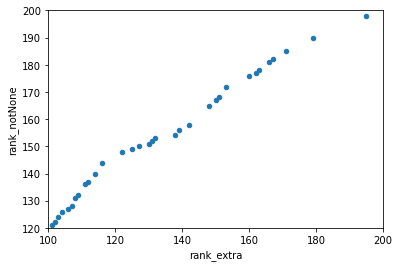

In [59]:
rank_matching_2.plot(kind='scatter', 
        x='rank_extra', 
        y='rank_notNone' 
        )
x1,x2,y1,y2 = plt.axis()
# plt.axis((0,50,0,60)) 
# plt.axis((50,80,60,100)) 
# plt.axis((80,100,100,120)) 
plt.axis((100,200,120,200)) 
# При таком способе усреднения (NaN = 0) среднее место в рейтинге увеличивается, т.к. на ранг влияет большое количество городов,
# которые попадали 1-2-3 раза в рейтинг и не были "оштрафованы" за неучастие в рейтинге прошлых лет. 
# Общее место города из числа середняков и аутсайдеров в таком списке увеличивается.
# Не понятно, какой способ усреднения результатов лучше. 
# Способ с NaN = 0 имеет право на рассмотрение, т.к. с годами появляются новые города в рейтинге, которые 
# отодвигают/побеждают прежних участников.
plt.show()

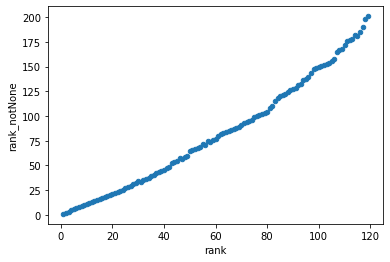

In [60]:
rank_matching_2.plot(kind='scatter', 
        x='rank', 
        y='rank_notNone' 
        )
x1,x2,y1,y2 = plt.axis()

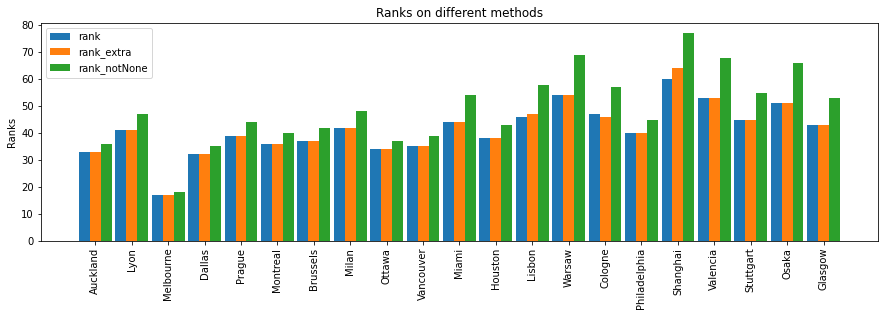

In [61]:
labels=rank_matching_2['City'].loc[30:50]
y1=rank_matching_2['rank'].loc[30:50]
y2=rank_matching_2['rank_extra'].loc[30:50] 
y3=rank_matching_2['rank_notNone'].loc[30:50] 

x = np.arange(len(labels))  # the label locations
width = 0.3  # the width of the bars

fig, ax = plt.subplots()

fig.set_figwidth(15) 

ax.bar(x-width, y1, width, label = 'rank')
ax.bar(x, y2, width, label = 'rank_extra')
ax.bar(x+width, y3, width, label = 'rank_notNone')

# x1,x2,y1,y2,y3,y4,y5,y6 = plt.axis() 
# plt.axis((100,200,120,200)) Как настроить отсекание куска данных только для показа на графике?

ax.set_ylabel('Ranks')
ax.set_title('Ranks on different methods')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation = 90)
ax.legend()

# ax.bar_label(y1) #Не получились надписи
# ax.bar_label(y2) 
# ax.bar_label(y3)

plt.show()

<AxesSubplot:>

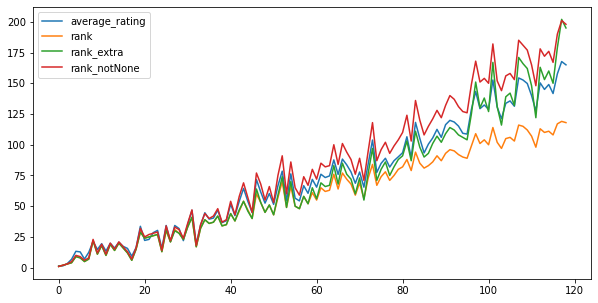

In [62]:
df = rank_matching_2[['City', 'average_rating', 'rank', 'rank_extra', 'rank_notNone']] 
# df2 = rank_matching_2_sorted_by_rank[['City', 'average_rating', 'rank', 'rank_extra', 'rank_notNone']] #Почему не пошел этот график??

# xticks = df['City'] #Не получается установить текстовые подписи по оси х

# ax = df.plot.line(figsize=(10,5))
# ax.set_xticks('xticks') # Не получается установить текстовые подписи по оси х

df.plot.line(figsize=(10,5))
# plt.xticks('xticks')
# Просится вывод: в узком списке наиболее близки показатели среднего места за шесть лет и рейтинга по широкому списку №1.

<AxesSubplot:>

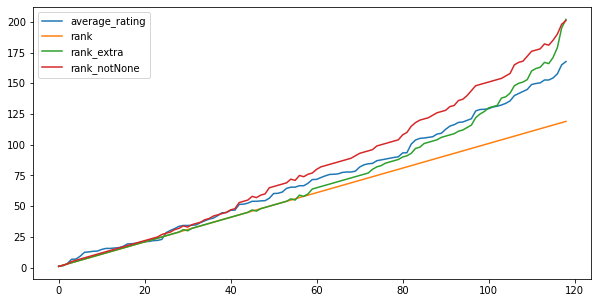

In [63]:
df2 = rank_matching_2[['City', 'average_rating', 'rank', 'rank_extra', 'rank_notNone']].sort_values(by='rank', 
                                                                  ascending = True).reset_index().drop(columns=['index'])
df2.plot.line(figsize=(10,5))
# Сортируем по какому-нибудь показателю, сбрасываем первоначальный индекс, и по новому индексу строим график

In [64]:
# Объединяем два широких списка со средними значениями и средними рейтингами
rank_matching_3 = r1_outer.merge(r2_outer, how = 'outer', on = ['City', 'Country'])
rank_matching_3_unsorted = rank_matching_3.loc[:,['City', 'Country', 'average_rating_extra',  
                       'average_rating_notNone', 'rank_extra', 'rank_notNone']]#.sort_values(by='rank_extra', ascending = True)
rank_matching_3_unsorted#.iloc[30:50]
# Получили список из 206 городов, у которых разные рейтинги по разным методам.

,City,Country,average_rating_extra,average_rating_notNone,rank_extra,rank_notNone
0,London,United Kingdom,1.50,1.500000,1.0,1.0
1,New York City,United States,1.50,1.500000,2.0,2.0
2,Seoul,South Korea,9.33,9.333333,6.0,7.0
3,Paris,France,3.33,3.333333,3.0,3.0
4,Amsterdam,Netherlands,7.00,7.000000,5.0,6.0
...,...,...,...,...,...,...
201,Seattle,United States,131.50,55.500000,135.0,64.0
202,Quebec City,Canada,139.00,78.000000,147.0,90.0
203,Asuncion,Paraguay,158.33,136.000000,182.0,159.0
204,Skopje,North Macedonia,161.33,145.000000,190.0,173.0


In [65]:
rank_matching_3_unsorted.corr()

,average_rating_extra,average_rating_notNone,rank_extra,rank_notNone
average_rating_extra,1.000000,0.907733,0.988584,0.906267
average_rating_notNone,0.907733,1.000000,0.907678,0.999277
rank_extra,0.988584,0.907678,1.000000,0.909133
rank_notNone,0.906267,0.999277,0.909133,1.000000


<AxesSubplot:>

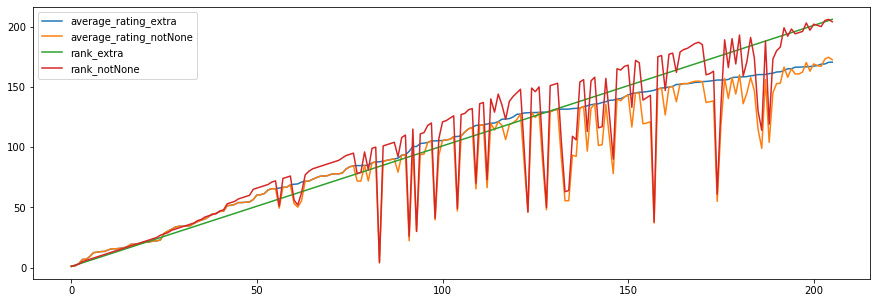

In [66]:
df3 = rank_matching_3[['City', 'average_rating_extra', 'average_rating_notNone', 
                       'rank_extra', 'rank_notNone']].sort_values(by='rank_extra', 
                                                                  ascending = True).reset_index().drop(columns=['index'])
df3.plot.line(figsize=(15,5))

In [67]:
df3.iloc[70:90]
# Хорошо видно, что в широком списке №2 "прорываются" в высокую часть рейтинга города, которых не было во всех шести годах.
# Например, Рейкьявик, который три последних года занимал 5 место, а ранее его не было. По второму списку он занимает 4 место,
# а по первому способу (со штрафами за неучастие) - 84 место. И в узком рейтинге его нет совсем.
# Случаи таких "прорывов" определим далее.

,City,average_rating_extra,average_rating_notNone,rank_extra,rank_notNone
70,Florence,77.50,77.500000,71.0,87.0
71,Nottingham,77.83,77.833333,72.0,88.0
72,Marseille,77.83,77.833333,73.0,89.0
73,Santiago,78.50,78.500000,74.0,91.0
74,Lille,81.83,81.833333,75.0,93.0
75,Buenos Aires,83.67,83.666667,76.0,94.0
76,Duisburg,84.50,84.500000,77.0,95.0
77,Antwerp,84.67,71.800000,78.0,78.0
78,Bratislava,84.67,71.800000,79.0,79.0
79,Ljubljana,84.83,84.833333,80.0,96.0


In [68]:
rank_matching_3['rank_notNone_break'] = rank_matching_3['rank_notNone'] - rank_matching_3['rank_extra']
rank_matching_3_break = rank_matching_3[abs(rank_matching_3['rank_notNone_break']) > 30]
rank_matching_3_break = rank_matching_3_break.sort_values(by='rank_notNone_break', 
                                                              ascending = True).loc[:,['City', 'Country', 'average_rating_extra',  
                       'average_rating_notNone', 'rank_extra', 'rank_notNone', 
                        'rank_notNone_break']]
rank_matching_3_break
# Получили список "прорывных" городов, которые могут составлять конкуренцию
# Не очень интересно, когда эти изменения происходят во второй сотне списка. Это просто добавляются новые города в рейтинг
# Интересно, что появляются сильные участники в топ-70. И даже пример Рейкьявика в пятерке лидеров.

,City,Country,average_rating_extra,average_rating_notNone,rank_extra,rank_notNone,rank_notNone_break
149,London,Canada,147.17,37.000000,158.0,38.0,-120.0
54,Abu Dhabi,Arab Emirates,155.67,55.000000,175.0,61.0,-114.0
184,Reykjavik,Iceland,87.83,5.000000,84.0,4.0,-80.0
199,Düsseldorf,Germany,129.00,48.000000,129.0,50.0,-79.0
198,Edinburgh,United Kingdom,128.50,46.500000,124.0,46.0,-78.0
194,Valladolid,Spain,160.17,99.000000,187.0,114.0,-73.0
200,Denver,United States,131.50,55.500000,134.0,63.0,-71.0
201,Seattle,United States,131.50,55.500000,135.0,64.0,-71.0
195,Vigo,Spain,161.00,104.000000,189.0,119.0,-70.0
185,Wellington,New Zealand,96.50,22.333333,92.0,26.0,-66.0


<AxesSubplot:xlabel='rank_notNone', ylabel='Count'>

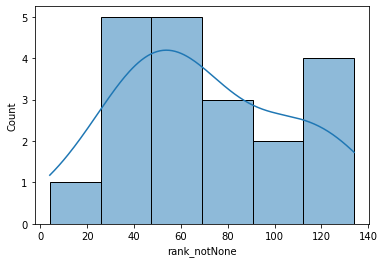

In [69]:
sns.histplot(data=rank_matching_3_break['rank_notNone'], kde=True)

<AxesSubplot:>

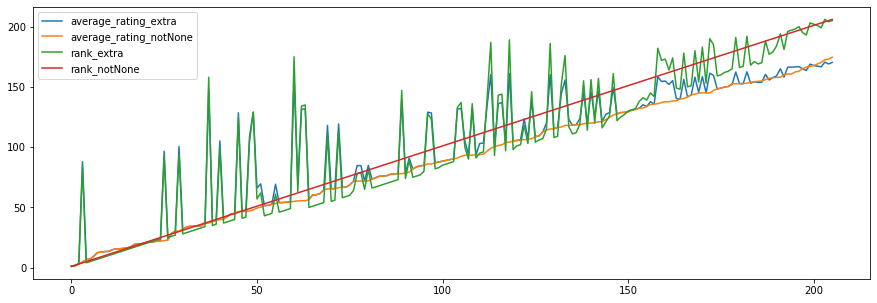

In [70]:
df4 = rank_matching_3[['City', 'average_rating_extra', 'average_rating_notNone', 
                       'rank_extra', 'rank_notNone']].sort_values(by='rank_notNone', 
                                                                  ascending = True).reset_index().drop(columns=['index'])
df4.plot.line(figsize=(15,5))

Загружаем рейтинг 2019 г. с общим рейтингом и местами, занятыми в каждом из 9 блоков.

In [71]:
full_rank_2019 = pd.read_excel('IESE_2019_full_data.xlsx')
full_rank_2019

,City_origin,Country_origin,City,Country,Ranking 2019,Economy,Human capital,Social cohesion,Environment,Governance,Urban planning,International projection,Technology,Mobility and Transportation
0,London,United Kingdom,London,United Kingdom,1,14,1,64,35,2,2,1,6,3
1,New York,USA,New York City,United States,2,1,3,151,69,30,1,6,8,1
2,Paris,France,Paris,France,3,13,6,74,48,44,12,2,20,2
3,Tokyo,Japan,Tokyo,Japan,4,3,9,51,6,26,23,30,22,56
4,Reykjavík,Iceland,Reykjavik,Iceland,5,86,22,14,1,25,125,16,58,57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,Bangkok,Thailand,Bangkok,Thailand,112,125,129,116,121,152,27,15,109,117
112,Panama,Panama,Panama City,Panama,113,84,145,103,40,149,50,80,151,140
113,San José,Costa Rica,San Jose,Costa Rica,114,123,155,112,14,77,132,101,132,144
114,Kiev,Ukraine,Kiev,Ukraine,115,133,104,160,123,93,4,117,152,124


Смотрим зависимости между рейтингами по категориям - на диаграмме рассеяния и через коэф-ты корреляции


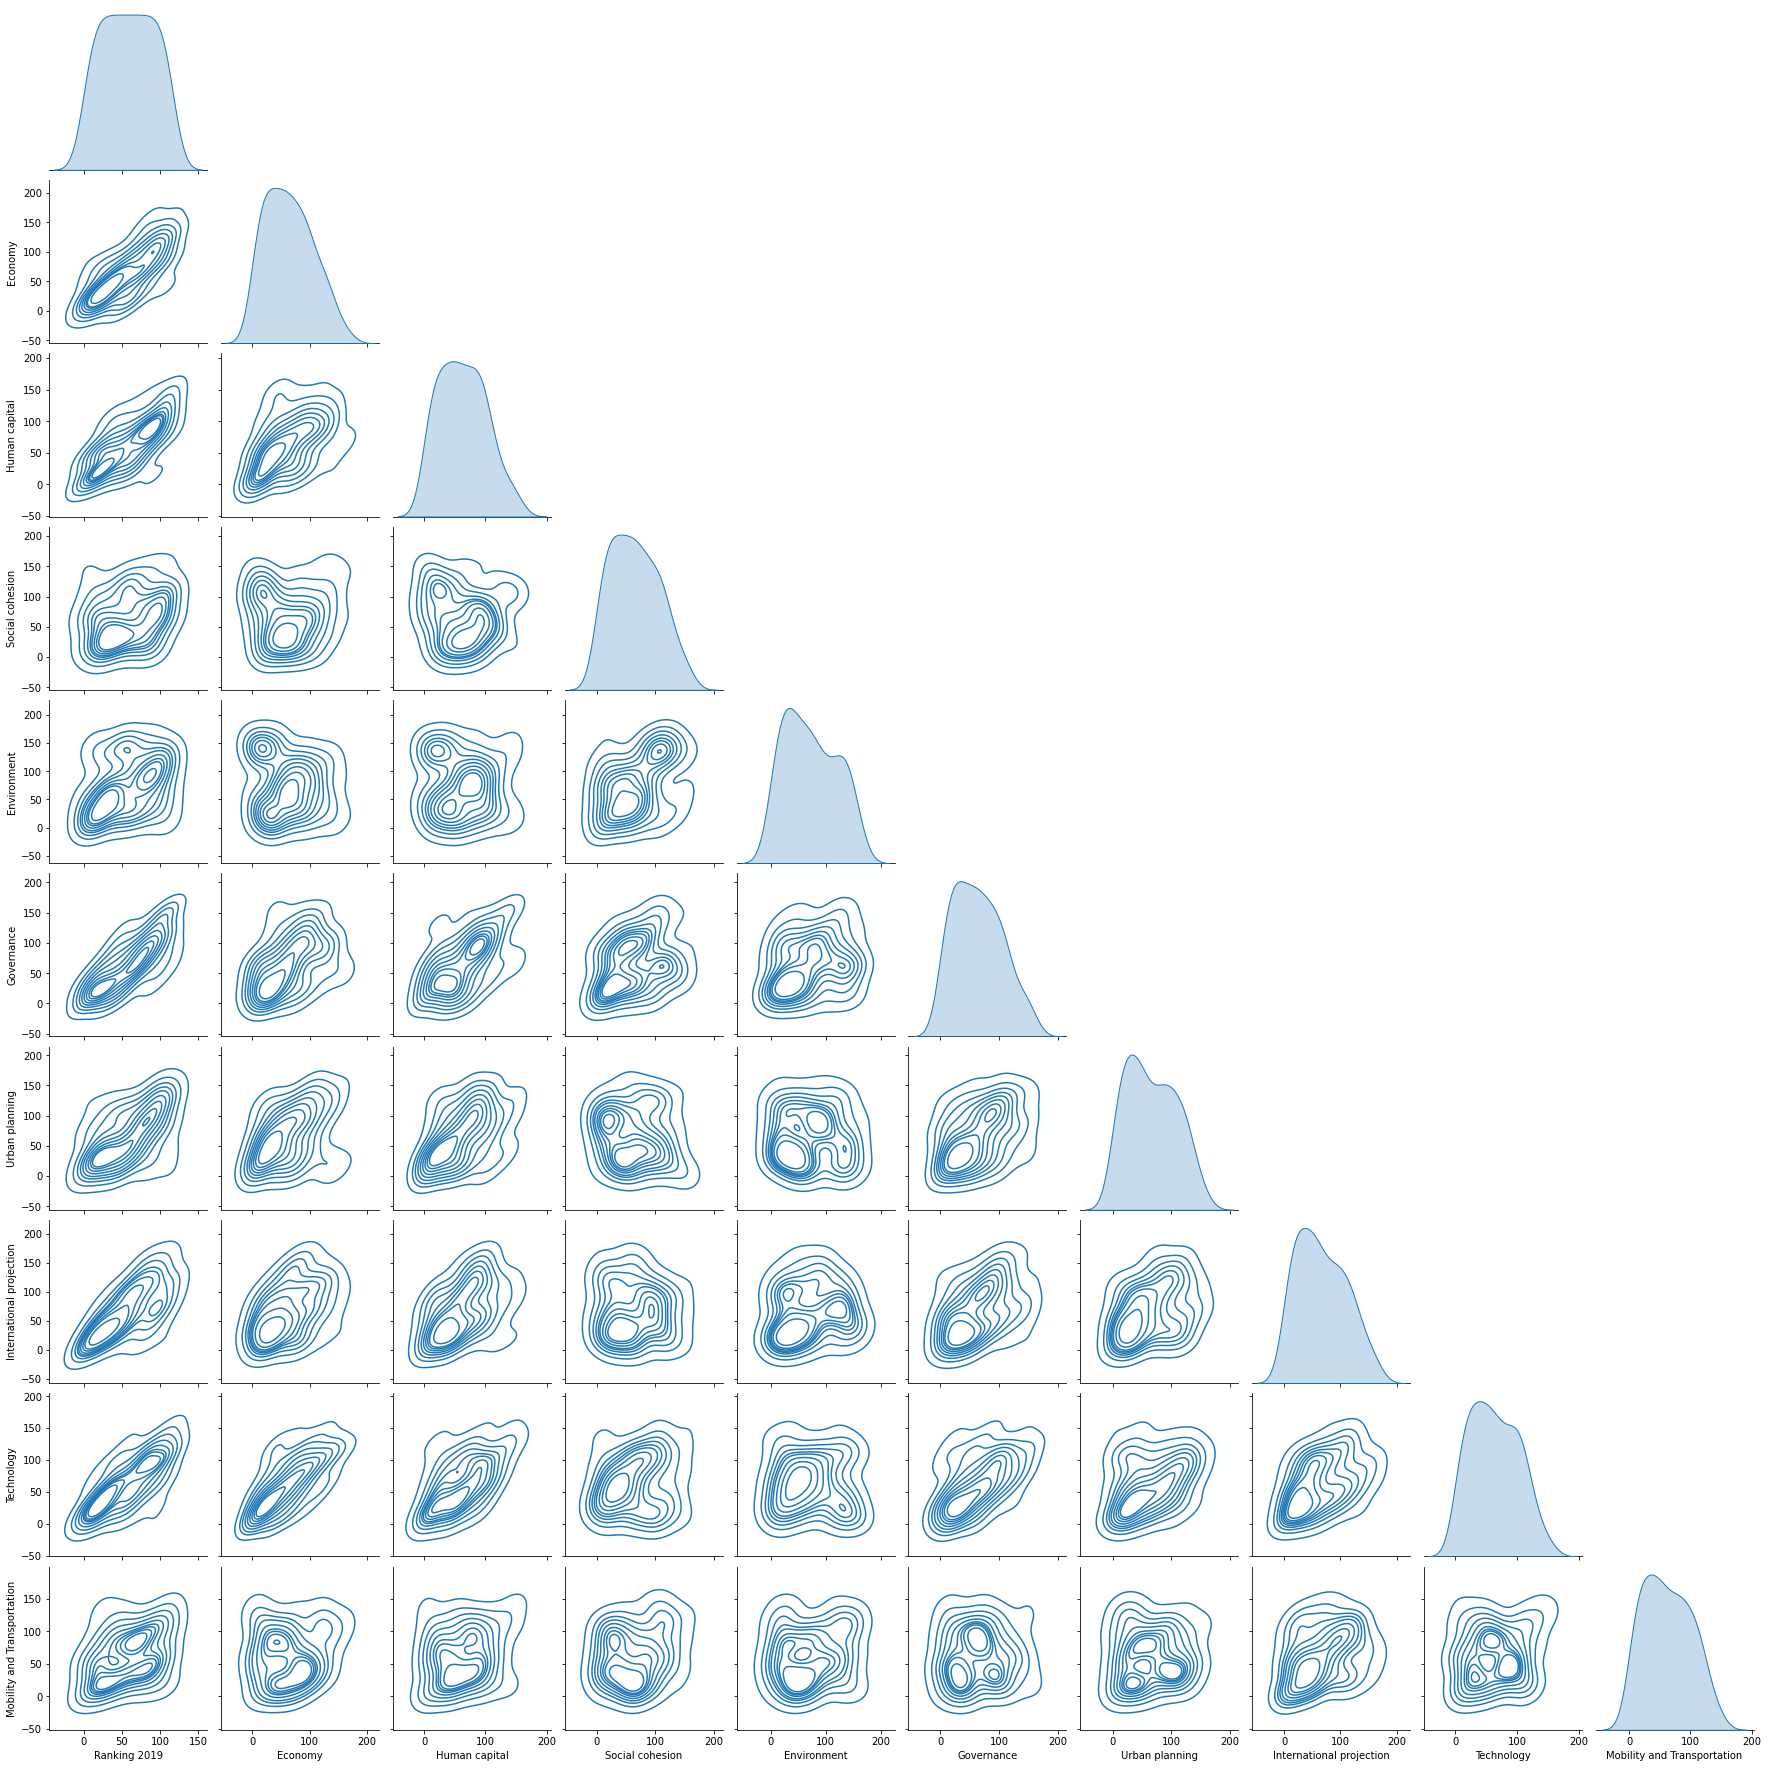

In [72]:
full_rank_2019_visual = full_rank_2019.filter(items = ['Ranking 2019', 'Economy', 'Human capital', 'Social cohesion',
                                                       'Environment', 'Governance', 'Urban planning', 
                                                       'International projection', 'Technology', 'Mobility and Transportation'])
# g = sns.pairplot(full_rank_2019_visual, kind = 'scatter', height = 1, corner=True)
# g.set_xticklabels(rotation=90) 
# sns.set_yticklabels(rotation=90) 

sns.pairplot(full_rank_2019_visual, kind="kde", corner=True)

In [73]:
# full_rank_2019_visual.corr(method='kendall')
# full_rank_2019_visual.corr(method='spearman')
full_rank_2019_visual.corr()

,Ranking 2019,Economy,Human capital,Social cohesion,Environment,Governance,Urban planning,International projection,Technology,Mobility and Transportation
Ranking 2019,1.000000,0.719816,0.712948,0.263856,0.308003,0.743060,0.531847,0.665437,0.723246,0.362682
Economy,0.719816,1.000000,0.476771,0.042540,-0.114120,0.434567,0.395399,0.413934,0.694773,0.130450
Human capital,0.712948,0.476771,1.000000,-0.085135,-0.033690,0.564213,0.459799,0.450432,0.530887,0.206748
Social cohesion,0.263856,0.042540,-0.085135,1.000000,0.385146,0.285898,-0.121496,-0.051432,0.175168,0.161322
Environment,0.308003,-0.114120,-0.033690,0.385146,1.000000,0.230388,-0.046787,0.107483,-0.005383,0.123877
Governance,0.743060,0.434567,0.564213,0.285898,0.230388,1.000000,0.397516,0.412199,0.530368,0.033978
Urban planning,0.531847,0.395399,0.459799,-0.121496,-0.046787,0.397516,1.000000,0.329566,0.317206,0.068061
International projection,0.665437,0.413934,0.450432,-0.051432,0.107483,0.412199,0.329566,1.000000,0.419507,0.286725
Technology,0.723246,0.694773,0.530887,0.175168,-0.005383,0.530368,0.317206,0.419507,1.000000,0.159336
Mobility and Transportation,0.362682,0.130450,0.206748,0.161322,0.123877,0.033978,0.068061,0.286725,0.159336,1.000000


<AxesSubplot:>

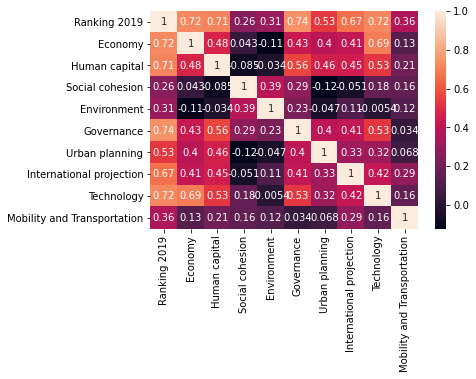

In [74]:
sns.heatmap(full_rank_2019_visual.corr(), annot=True)

У общего рейтинга больше корреляции с: Управлением, Экономикой, Человеческим капиталом, Технологиями и Международными связями, это, скорее всего, зависит от того, что эти категории имеют больше вес при подсчете общего рейтинга.
Между отдельными категориями высокие корреляции: 
Экономика - Технология (0,69), 
Человеческий капитал - Управление (0,53), 
Управление - Технология (0,53)

In [75]:
indicator_list_2019 = pd.read_excel('IESE_2019_CIMI_indicator_list.xlsx')
indicator_list_2019.groupby('Dimensions').count()

,No,Indicator,Description/Unit of measurement,Source
Dimensions,,,,
Economy,12,12,12,12
Environment,11,11,11,11
Governance,12,12,12,12
Human Capital,10,10,10,10
International Projection,6,6,6,6
Mobility and Transportation,13,13,13,13
Social Cohesion,15,15,15,15
Technology,17,17,17,17
Urban Planning,5,5,5,5


Смотрим зависимость итогового рейтинга города от вариабельности отдельных рейтингов по категориям (стандартного отклонения отдельных рейтингов от среднего). Возможно, это не совсем верно, т.к. итоговый рейтинг получается не средним арифметическим, а с учетом весовых коэф-тов категорий. Но колеблемость/амплитудность мест будет отражаться верно.
По итогам будем делить на четыре блока: 
1. успешные и стабильные (места в первой половине выборки, отклонения между рейтингами категорий небольшое)
2. успешные и нестабильные (места в первой половине выборки, отклонения между рейтингами категорий большое)
3. отстающие и не подающие надежд (места во второй половине, отклонения между рейтингами категорий небольшое)
4. отстающие и потенциально способные прорваться (места во второй половине, отклонения между рейтингами категорий большое)

In [76]:
full_rank_2019['stdev_category_rating'] = np.std(full_rank_2019[['Economy', 'Human capital', 'Social cohesion',
                                                       'Environment', 'Governance', 'Urban planning', 
                                                       'International projection', 'Technology', 
                                                        'Mobility and Transportation']], axis=1).round(2)
full_rank_2019

,City_origin,Country_origin,City,Country,Ranking 2019,Economy,Human capital,Social cohesion,Environment,Governance,Urban planning,International projection,Technology,Mobility and Transportation,stdev_category_rating
0,London,United Kingdom,London,United Kingdom,1,14,1,64,35,2,2,1,6,3,20.42
1,New York,USA,New York City,United States,2,1,3,151,69,30,1,6,8,1,47.70
2,Paris,France,Paris,France,3,13,6,74,48,44,12,2,20,2,23.68
3,Tokyo,Japan,Tokyo,Japan,4,3,9,51,6,26,23,30,22,56,17.57
4,Reykjavík,Iceland,Reykjavik,Iceland,5,86,22,14,1,25,125,16,58,57,38.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,Bangkok,Thailand,Bangkok,Thailand,112,125,129,116,121,152,27,15,109,117,44.44
112,Panama,Panama,Panama City,Panama,113,84,145,103,40,149,50,80,151,140,41.09
113,San José,Costa Rica,San Jose,Costa Rica,114,123,155,112,14,77,132,101,132,144,40.43
114,Kiev,Ukraine,Kiev,Ukraine,115,133,104,160,123,93,4,117,152,124,43.11


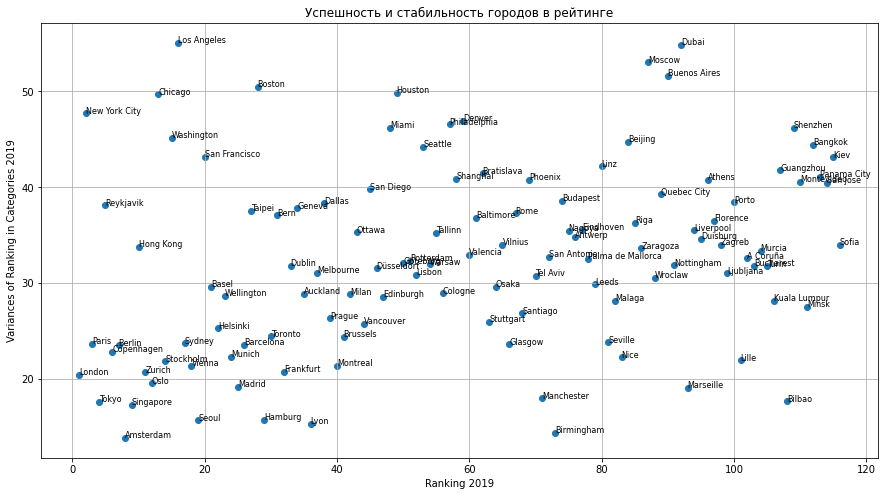

In [140]:
x = full_rank_2019['Ranking 2019']
y = full_rank_2019['stdev_category_rating']
labels = full_rank_2019['City']

fig, ax = plt.subplots()

ax.scatter(x, y)

# Разделить на 4 части: Успешные + Неуспешные + Стабильные + Нестабильные. На 4 отдельных графика
ax.set_xlabel('Ranking 2019')
ax.set_ylabel('Variances of Ranking in Categories 2019')
ax.grid()

# Добавим подписи возле каждого города. Пока их много, мешается, но при меньшем количестве значений или при большем
# размере графика зато будет показательно, кто именно попал в какую категорию.
for i, txt in enumerate(labels):
    ax.annotate(txt, (x[i], y[i]), fontsize = 8) 

ax.set_title('Успешность и стабильность городов в рейтинге')
fig.set_figwidth(15)    #  ширина и высота
fig.set_figheight(8)    
plt.show()

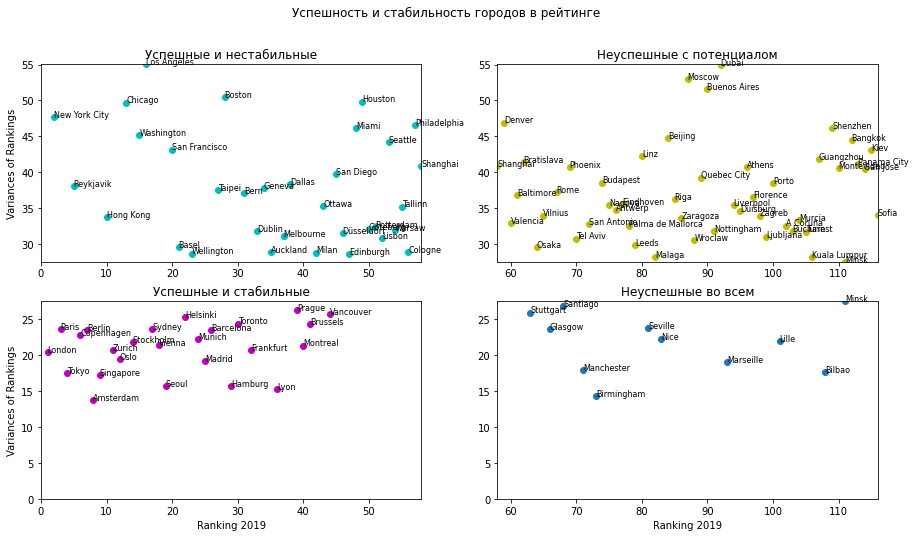

In [202]:
# Второй вариант: делаем 4 отдельных графика. 
# Попробуем нарисовать все 4 графика на одной картинке

x_half = full_rank_2019['Ranking 2019'].count()/2
x_max = full_rank_2019['Ranking 2019'].count()
y_half = full_rank_2019['stdev_category_rating'].max()/2
y_max = full_rank_2019['stdev_category_rating'].max()

# labels_1 = full_rank_2019['City'].loc[:x_half]
# labels_2 = full_rank_2019['City'].loc[x_half:x_max]
labels = full_rank_2019['City']

x = full_rank_2019['Ranking 2019']
y = full_rank_2019['stdev_category_rating']

fig, axs = plt.subplots(nrows=2, ncols=2)

axs[1, 0].scatter(x, y, color = 'm')
axs[1, 0].set_xlim(0, x_half)
axs[1, 0].set_ylim(0, y_half)
axs[1, 0].set_xlabel('Ranking 2019')
axs[1, 0].set_ylabel('Variances of Rankings')
axs[1, 0].set_title('Успешные и стабильные')
                        
axs[0, 0].scatter(x, y, color = 'c')
axs[0, 0].set_xlim(0, x_half)
axs[0, 0].set_ylim(y_half, y_max)
axs[0, 0].set_ylabel('Variances of Rankings')
axs[0, 0].set_title('Успешные и нестабильные')
                        
axs[0, 1].scatter(x, y, color = 'y')
axs[0, 1].set_xlim(x_half, x_max)
axs[0, 1].set_ylim(y_half, y_max)
axs[0, 1].set_title('Неуспешные с потенциалом')
                        
axs[1, 1].scatter(x, y)
axs[1, 1].set_xlim(x_half, x_max)
axs[1, 1].set_ylim(0, y_half)
axs[1, 1].set_xlabel('Ranking 2019')
axs[1, 1].set_title('Неуспешные во всем')

# axs.grid()

# Потом добавить аннотации
# for i, txt1 in enumerate(labels_1):
#     axs[0, 0].annotate(txt1, (x[i], y[i]), fontsize = 8) 
#     axs[1, 0].annotate(txt1, (x[i], y[i]), fontsize = 8) 

for i, txt in enumerate(labels):
    axs[0, 0].annotate(txt, (x[i], y[i]), fontsize = 8) 
    axs[1, 0].annotate(txt, (x[i], y[i]), fontsize = 8) 
    axs[0, 1].annotate(txt, (x[i], y[i]), fontsize = 8) 
    axs[1, 1].annotate(txt, (x[i], y[i]), fontsize = 8)

fig.suptitle('Успешность и стабильность городов в рейтинге')
fig.set_figwidth(15)    #  ширина и высота
fig.set_figheight(8) 

# fig.tight_layout()
plt.show()

In [190]:
for i, txt2 in enumerate(labels_2):
    print (i, txt2)

0 index
1 City


In [194]:
for i, txt2 in labels_2:
    print (i, txt2)

ValueError: too many values to unpack (expected 2)

In [195]:
labels_2 = full_rank_2019['City'].loc[x_half:x_max]
labels_2

58                Denver
59              Valencia
60             Baltimore
61            Bratislava
62             Stuttgart
63                 Osaka
64               Vilnius
65               Glasgow
66                  Rome
67              Santiago
68               Phoenix
69              Tel Aviv
70            Manchester
71           San Antonio
72            Birmingham
73              Budapest
74                Nagoya
75               Antwerp
76             Eindhoven
77     Palma de Mallorca
78                 Leeds
79                  Linz
80               Seville
81                Malaga
82                  Nice
83               Beijing
84                  Riga
85              Zaragoza
86                Moscow
87               Wroclaw
88           Quebec City
89          Buenos Aires
90            Nottingham
91                 Dubai
92             Marseille
93             Liverpool
94              Duisburg
95                Athens
96              Florence
97                Zagreb


Посмотрим состав в рейтинге по странам

In [78]:
indicator_list_2019 = pd.read_excel('IESE_2019_CIMI_indicator_list.xlsx')


Посмотрим, какие места в рейтинге занимает Россия.

In [79]:
r1_Russia = r1[r1.Country == 'Russia'].filter(items = ['City', 'Country', 'Ranking 2014', 'Ranking 2015', 'Ranking 2016', 
                           'Ranking 2017', 'Ranking 2018', 'Ranking 2019', 'average_rating'])
r1_Russia

,City,Country,Ranking 2014,Ranking 2015,Ranking 2016,Ranking 2017,Ranking 2018,Ranking 2019,average_rating
82,Moscow,Russia,90,108,89,70,86,87,88.33
102,St Petersburg,Russia,115,133,103,123,121,124,119.83


In [80]:
r2_Russia = r2[r2.Country == 'Russia'].filter(items = ['City', 'Country', 'CIMI 2014', 'CIMI 2015', 'CIMI 2016', 
                           'CIMI 2017', 'CIMI 2018', 'CIMI 2019','average_CIMI'])
r2_Russia

,City,Country,CIMI 2014,CIMI 2015,CIMI 2016,CIMI 2017,CIMI 2018,CIMI 2019,average_CIMI
82,Moscow,Russia,57.69,58.12,61.83,55.50,55.91,55.74,57.46
102,St Petersburg,Russia,49.35,53.59,57.46,42.37,44.12,44.78,48.61


In [81]:
# Это датафрейм, в котором заменены пропущенные значения рейтинга на последнее место +1.
r1_outer_Russia = r1_outer[r1_outer.Country == 'Russia'].filter(items = ['City', 'Country', 'Ranking 2014', 'Ranking 2015', 'Ranking 2016', 
                           'Ranking 2017', 'Ranking 2018', 'Ranking 2019', 'average_rating_extra'])
r1_outer_Russia

,City,Country,Ranking 2014,Ranking 2015,Ranking 2016,Ranking 2017,Ranking 2018,Ranking 2019,average_rating_extra
89,Moscow,Russia,90.0,108.0,89.0,70.0,86.0,87.0,88.33
114,St Petersburg,Russia,115.0,133.0,103.0,123.0,121.0,124.0,119.83
172,Novosibirsk,Russia,149.0,154.0,152.0,142.0,156.0,159.0,152.00


In [82]:
# Это полная таблица рейтингов за все годы, с NaN
rаnk_2014_2019_outer_Russia = rank_2014_2019_outer[rank_2014_2019_outer.Country == 'Russia'].filter(items = ['City', 'Country', 
                            'Ranking 2014', 'Ranking 2015', 'Ranking 2016', 
                            'Ranking 2017', 'Ranking 2018', 'Ranking 2019'])
rаnk_2014_2019_outer_Russia

,City,Country,Ranking 2014,Ranking 2015,Ranking 2016,Ranking 2017,Ranking 2018,Ranking 2019
89,Moscow,Russia,90.0,108.0,89.0,70.0,86.0,87.0
114,St Petersburg,Russia,115.0,133.0,103.0,123.0,121.0,124.0
172,Novosibirsk,Russia,NaN,154.0,152.0,142.0,156.0,159.0


In [83]:
rank_matching_3[rank_matching_3.Country == 'Russia'].filter(items = ['City', 'Country', 'average_rating_extra',  
                       'average_rating_notNone', 'rank_extra', 'rank_notNone'])

,City,Country,average_rating_extra,average_rating_notNone,rank_extra,rank_notNone
89,Moscow,Russia,88.33,88.333333,85.0,101.0
114,St Petersburg,Russia,119.83,119.833333,114.0,140.0
172,Novosibirsk,Russia,152.00,152.600000,165.0,179.0


<AxesSubplot:>

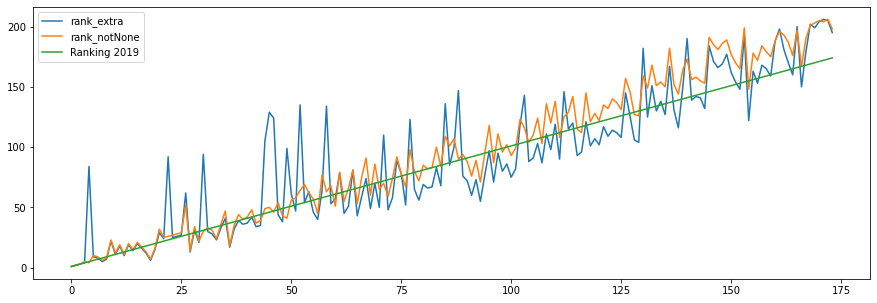

In [84]:
# Объединим средние широкие рейтинги с рейтингом 2019 г. 
# Но это узкий список, надо объединить с исходным рейтингом 2019.
rank_matching_2019 = rank_matching_3.merge(rank_2019, how = 'inner', on = ['City', 
                    'Country']).loc[:,['City', 'Country', 'rank_extra', 
                     'rank_notNone', 'Ranking 2019']].sort_values(by='Ranking 2019', 
                    ascending = True).reset_index().drop(columns=['index'])
rank_matching_2019.plot.line(figsize=(15,5))
# rank_matching_2019

In [85]:
rank_matching_2019.corr()
# Рейтинг 2019 показывает лучше корреляцию с рейтингом широкого списка №2. Возможно, из-за Рейкьявика и других прорывов

,rank_extra,rank_notNone,Ranking 2019
rank_extra,1.000000,0.934957,0.902913
rank_notNone,0.934957,1.000000,0.982016
Ranking 2019,0.902913,0.982016,1.000000


Сравнение рейтингов по сокращенному и двум расширенным рейтингам на примере городов России показывает:
1. "Узкое" объединение рейтингов и индексов за все годы с последующим усреднением не позволяет определить реальное среднее место города за период. Потому что из рейтингов выпадает большое количество городов, не попавших хотя бы в один из рейтингов, но реально изменяющих общий рейтинг в некоторые годы. 87 городов из общего числа 206 когда-либо оцениваемых городов не попадает в "узкий" объединенный список (42%).
2. Если использовать метод усреднения NaN = 0 в "широком" объединении рейтингов, то средний рейтинг города чаще становится хуже за счет допуска нерегулярных или недавно подключившихся участников. Может быть несправедливым. Город, стабильно участвующий в рейтинге, проигрывает новичку из одного-двух последних списков. Но гораздо интереснее кажется обратное: если город стал участовать недавно и занимает хорошие позиции, то его незаслуженно оттеснять штрафным усреднением на задние места. Как показало сравнение двух видов рейтингов из широкого списка, таких прорывных городов достаточно
3. Метод усреднения по принципу NaN = последнее место + 1 кажется более объективным. Допускаются все участники: если не участвовал ранее, то становится в конце списка. Было предположение, что несколько пропусков по годам не сильно ухудшит позицию по такому усреднению. Но оказалось, что в рейтинг прорвались города, которые смогли стать лидерами или существенно потеснить других постоянных участников. 
Таким образом, выведение рейтинга по среднему без штрафных очков оказывается менее стабильным, но более приближенным к реальности.

Добавляем регионы: сколько стран в каждом регионе участвовало, среди всех годов

In [86]:
regions = pd.read_excel('CountriesByRegions.xlsx')
regions_in_rank = rank_2014_2019_outer.merge(regions, on = ['Country']).loc[:,['City', 
                                'Country', 'Region', 'Ranking 2014', 'Ranking 2015', 
                                'Ranking 2016', 'Ranking 2017', 'Ranking 2018', 'Ranking 2019']]
regions_in_rank
# 6 стран потерялись. Видимо, написание стран в рейтинге отличается от написания стран в перечне стран по регионам. Не существенно
# regions_in_rank.groupby(['Region', 'Country']).head(10)
# regions_in_rank['Region'].value_counts()# .value_counts()
# df.groupby(["id", "group"])["term"].value_counts().unstack(fill_value=0)

,City,Country,Region,Ranking 2014,Ranking 2015,Ranking 2016,Ranking 2017,Ranking 2018,Ranking 2019
0,London,United Kingdom,Europe,1.0,2.0,2.0,2.0,1.0,1.0
1,Liverpool,United Kingdom,Europe,20.0,48.0,55.0,82.0,94.0,94.0
2,Birmingham,United Kingdom,Europe,23.0,47.0,62.0,58.0,63.0,73.0
3,Glasgow,United Kingdom,Europe,26.0,46.0,39.0,68.0,64.0,66.0
4,Manchester,United Kingdom,Europe,31.0,43.0,57.0,59.0,78.0,71.0
...,...,...,...,...,...,...,...,...,...
195,Karachi,Pakistan,Asia,NaN,181.0,180.0,165.0,174.0,173.0
196,Lahore,Pakistan,Asia,NaN,NaN,NaN,NaN,173.0,172.0
197,Reykjavik,Iceland,Europe,NaN,NaN,NaN,5.0,5.0,5.0
198,Panama City,Panama,Central America,NaN,NaN,NaN,94.0,114.0,113.0


In [87]:
regions_in_rank.groupby(['Region']).count()
# regions_in_rank.groupby(['Region', 'Country']).count()
# stats.groupby(['group', 'campaign']).count().head()

,City,Country,Ranking 2014,Ranking 2015,Ranking 2016,Ranking 2017,Ranking 2018,Ranking 2019
Region,,,,,,,,
Africa,12,12,6,11,11,9,9,9
Asia,51,51,36,47,47,34,36,36
Australia,2,2,2,2,2,2,2,2
Central America,7,7,4,6,6,5,5,5
Europe,80,80,58,70,70,75,76,76
North America,22,22,15,17,16,18,21,21
Oceania,2,2,1,1,1,2,2,2
South America,24,24,21,23,23,20,21,21


In [88]:
# Чтобы смотреть, какие страны входят в регион
regions_in_rank[regions_in_rank.Region == 'South America'].groupby(['Region', 'Country', 'City']).count()

Ranking 2014  Ranking 2015  \
Region        Country   City                                         
South America Argentina Buenos Aires               1             1   
                        Cordoba                    1             1   
                        Rosario                    1             1   
              Bolivia   La Paz                     1             1   
                        Santa Cruz                 0             1   
              Brasil    Belo Horizonte             1             1   
                        Brasilia                   1             1   
                        Curitiba                   1             1   
                        Fortaleza                  1             1   
                        Porto Alegre               1             1   
                        Recife                     1             1   
                        Rio de Janeiro             1             1   
                        Salvador                   1             1   
                        São Paulo                  1             1   
              Chile     Santiago                   1             1   
              Colombia  Bogota                     1             1   
                        Cali                       1             1   
                        Medellín                   1             1   
              Ecuador   Guayaquil                  0             1   
                        Quito                      1             1   
              Paraguay  Asuncion                   0             0   
              Peru      Lima                       1             1   
              Uruguay   Montevideo                 1             1   
              Venezuela Caracas                    1             1   

                                        Ranking 2016  Ranking 2017  \
Region        Country   City                                         
South America Argentina Buenos Aires               1             1   
                        Cordoba                    1             1   
                        Rosario                    1             1   
              Bolivia   La Paz                     1             1   
                        Santa Cruz                 1             1   
              Brasil    Belo Horizonte             1             1   
                        Brasilia                   1             1   
                        Curitiba                   1             1   
                        Fortaleza                  1             0   
                        Porto Alegre               1             0   
                        Recife                     1             0   
                        Rio de Janeiro             1             1   
                        Salvador                   1             1   
                        São Paulo                  1             1   
              Chile     Santiago                   1             1   
              Colombia  Bogota                     1             1   
                        Cali                       1             1   
                        Medellín                   1             1   
              Ecuador   Guayaquil                  1             1   
                        Quito                      1             1   
              Paraguay  Asuncion                   0             0   
              Peru      Lima                       1             1   
              Uruguay   Montevideo                 1             1   
              Venezuela Caracas                    1             1   

                                        Ranking 2018  Ranking 2019  
Region        Country   City                                        
South America Argentina Buenos Aires               1             1  
                        Cordoba                    1             1  
                        Rosario                    1             1  
              Bolivia   La Paz                     1 

<AxesSubplot:>

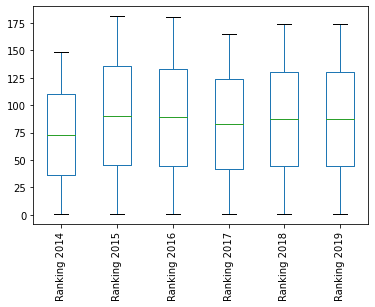

In [89]:
# Диаграмма-боксплот среднего количества мест за все годы. Показывает только размах количества городов в разных отчетах.
# Не показательно. 
regions_in_rank.boxplot(grid=False, rot=90)

<AxesSubplot:title={'center':'Ranking 2019'}, xlabel='[Region]'>

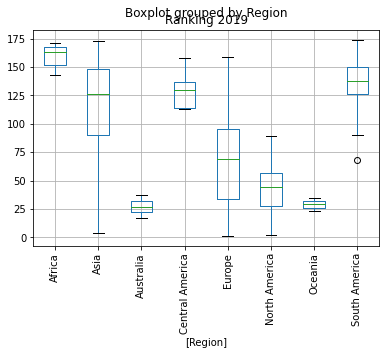

In [90]:
# Показывает участие стран по количеству городов и оценкам в отчете с рейтингом 2019 г. 
# Минус диаграммы - нет цвета, плохо поддается расстановке меток, изменению вида. По сути - хорошо.
regions_in_rank.boxplot(column=['Ranking 2019'], by=['Region'], rot=90)
# plt.grid(axis = 'x') # Не получается, что-то криво
# plt.figsize=(10,6) #Не получается сделать изменение размера
# sns.boxplot(x=regions_in_rank['Region'], y=regions_in_rank['Ranking 2019'])
# regions_in_rank['Ranking 2019'].boxplot()

# plt.xticks(x, labels, rotation='vertical') Так не работает


In [91]:
# Боксплот с рейтингом по регионам в Seaborn - лучше выглядит. 
# НО ЛОМАЕТ ПРЕДСТАВЛЕНИЕ ВСЕХ ОСТАЛЬНЫХ ГРАФИКОВ! ПОЯВЛЯЕТСЯ ОШИБКА И ОТРИСОВЫВАЕТСЯ В ДРУГОМ ЦВЕТЕ И С СЕТКОЙ!
# sns.set_style("whitegrid")
# sns.boxplot(x=regions_in_rank['Region'], y=regions_in_rank['Ranking 2019'])
# plt.xticks(rotation=90)
# sns.set(rc={'figure.figsize':(7,3)})
# plt.figure(figsize=(10,30)) #Не смогла установить размер диаграммы 
# a.fig.set_figwidth(15) #Не смогла установить размер диаграммы
# plt.show()

In [92]:
regions_in_rank.groupby(['Region']).mean().round(1)

,Ranking 2014,Ranking 2015,Ranking 2016,Ranking 2017,Ranking 2018,Ranking 2019
Region,,,,,,
Africa,130.0,159.3,161.8,153.1,163.7,159.8
Asia,91.9,118.3,118.7,103.1,115.3,114.1
Australia,21.5,13.5,15.0,13.5,19.5,27.0
Central America,111.5,130.3,124.8,119.6,131.6,130.4
Europe,50.3,64.5,62.1,65.1,66.5,66.0
North America,38.7,22.2,20.2,36.4,40.7,42.4
Oceania,38.0,29.0,44.0,23.0,30.5,29.0
South America,116.4,130.7,128.1,130.0,131.1,135.0


<AxesSubplot:xlabel='Region'>

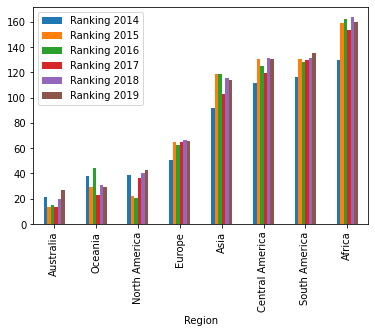

In [93]:
# На диаграмме - средний рейтинг у регионов по годам
a = regions_in_rank.groupby(['Region']).mean().round(1).sort_values(by='Ranking 2019', ascending=True)
a.plot.bar()


In [94]:
regions_in_CIMI = rank_2014_2019_outer.merge(regions, on = ['Country']).loc[:,['City', 
                                'Country', 'Region', 'CIMI 2014', 'CIMI 2015', 
                                'CIMI 2016', 'CIMI 2017', 'CIMI 2018', 'CIMI 2019']]
regions_in_CIMI.groupby(['Region']).mean().round(1)

,CIMI 2014,CIMI 2015,CIMI 2016,CIMI 2017,CIMI 2018,CIMI 2019
Region,,,,,,
Africa,43.1,44.3,41.5,28.7,25.2,29.9
Asia,56.1,56.0,53.5,46.4,44.2,45.7
Australia,79.1,85.4,81.6,74.2,75.2,70.3
Central America,50.0,52.7,52.2,41.7,41.0,42.5
Europe,70.0,70.7,68.2,57.7,61.5,60.8
North America,73.8,83.8,81.1,66.4,68.3,66.9
Oceania,73.2,79.6,71.2,69.0,71.0,69.5
South America,48.1,53.2,51.1,38.1,39.4,39.5


<AxesSubplot:xlabel='Region'>

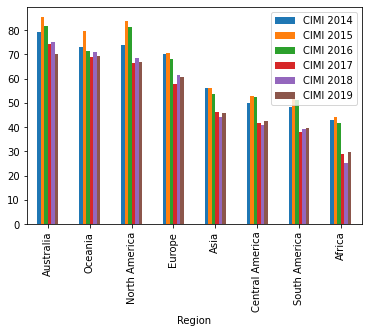

In [95]:
b = regions_in_CIMI.groupby(['Region']).mean().round(1).sort_values(by='CIMI 2019', ascending=False)
b.plot.bar()
# Видно, что индексы Австралии, Океании, Северной Америки и Европы довольно близки, хотя средний рейтинг у Европы 
# гораздо дальше отстоит от Австралии/Океании

Добавить население городов. Разбить на группы по количеству населения. Показать средний рейтинг по количеству населения

In [96]:
# Смотрим по всем городам в рейтингах за 6 лет
populations = pd.read_excel('CitiesPopulations.xlsx')
populations_in_rank = rank_2014_2019_outer.merge(populations, on = ['City', 'Country']).loc[:,['City', 
                                                                        'Country', 'Population2021']]
populations_in_rank['Population2021'] = populations_in_rank['Population2021'] / 1000
populations_in_rank

,City,Country,Population2021
0,London,United Kingdom,9425.622
1,New York City,United States,8230.290
2,Seoul,South Korea,9967.677
3,Paris,France,11078.546
4,Amsterdam,Netherlands,1157.519
...,...,...,...
172,Seattle,United States,776.555
173,Quebec City,Canada,831.776
174,Asuncion,Paraguay,3394.309
175,Skopje,North Macedonia,600.708


In [97]:
populations_in_rank['Population2021'].min()

504.491

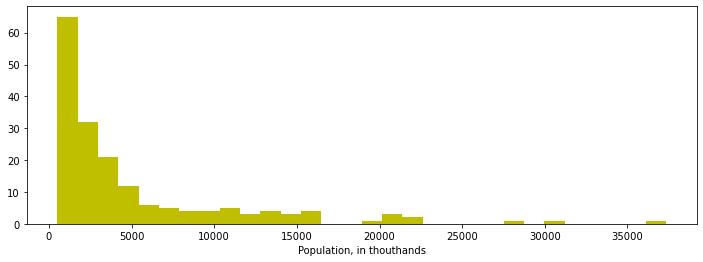

In [98]:
# populations_in_rank.plot.hist(bins=20) Это простой способ построения графика, к нему плохо добавлять опции графика
y = populations_in_rank['Population2021']

fig, ax = plt.subplots()
fig.set_figwidth(12)
ax.hist(y, 30, color='y')
# ax.set_xlim([100, 5000])
ax.set_xlabel('Population, in thouthands')
plt.show()


In [99]:
# Функция определяет, к какой категории по размеру населения отнести город.
def city_size(row):
    if (row['Population2021'] > 10000):
        return 'Mega'
    elif (row['Population2021'] > 5000):
        return 'Large'
    elif (row['Population2021'] > 1000):
        return 'Medium'
    elif (row['Population2021'] > 600):
        return 'Small'
    else: 
        return 'Smallest'
#  Функция для показа минимального размера населения в категории, в тысячах человек, чтобы расставлять по возрастанию   
def city_size_in_thou(row):
    if (row['Population2021'] > 10000):
        return '10000'
    elif (row['Population2021'] > 5000):
        return '5000'
    elif (row['Population2021'] > 1000):
        return '1000'
    elif (row['Population2021'] > 600):
        return '600'
    else: 
        return '500'

In [100]:
# Оставляем город, страну и размер города
city_size_in_rank = pd.concat([populations_in_rank[['City', 'Country']], pd.Series(
    populations_in_rank.apply(city_size, axis=1), name = 'City size'), pd.Series(
    populations_in_rank.apply(city_size_in_thou, axis=1), name = 'More than in thousands')], axis=1)
city_size_in_rank['More than in thousands'] = pd.to_numeric(city_size_in_rank['More than in thousands'])
# city_size_in_rank = city_size_in_rank.sort_values(by='More than in thousands', ascending=False)
city_size_in_rank

,City,Country,City size,More than in thousands
0,London,United Kingdom,Large,5000
1,New York City,United States,Large,5000
2,Seoul,South Korea,Large,5000
3,Paris,France,Mega,10000
4,Amsterdam,Netherlands,Medium,1000
...,...,...,...,...
172,Seattle,United States,Small,600
173,Quebec City,Canada,Small,600
174,Asuncion,Paraguay,Medium,1000
175,Skopje,North Macedonia,Small,600


In [101]:
# Делаем таблицу для графика
city_size_grouped = city_size_in_rank.groupby(['More than in thousands']).count().reset_index()
city_size_grouped

,More than in thousands,City,Country,City size
0,500,7,7,7
1,600,25,25,25
2,1000,94,94,94
3,5000,23,23,23
4,10000,28,28,28


<AxesSubplot:>

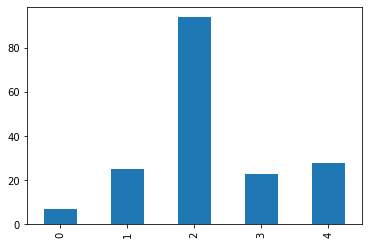

In [102]:
city_size_grouped['City'].plot.bar()

<AxesSubplot:xlabel='More than in thousands'>

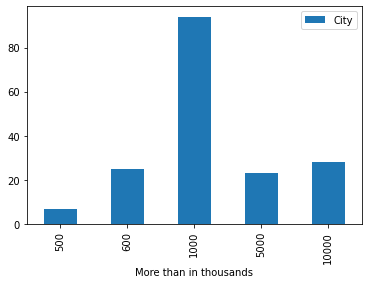

In [103]:
city_size_grouped.plot.bar(
    x = 'More than in thousands',
    y = 'City')

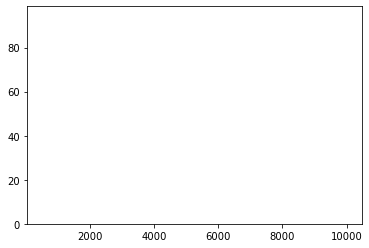

In [104]:
x = city_size_grouped['More than in thousands']
y = city_size_grouped['City']

fig, ax = plt.subplots()
# fig.set_figwidth(12)
ax.bar(x, y)
# ax.set_xlabel('Population, in thouthands')
plt.show()
# ПОЧЕМУ-ТО НЕ РИСУЕТ?! ПУСТОЙ ГРАФИК

Выведем топ-5 городов в каждой категории по размеру города, с местом в рейтинге и индексами 2019, с историей за прошлые годы
Мы не будем сравнивать показатели топ-5 из каждой категории, т.к. уже установили, что корреляции между населением города и его высоким рейтингом нет. Просто покажем лучших представителей каждой категории 

In [105]:
top_5_smallest_cities = city_size_in_rank[city_size_in_rank['City size'] == 'Smallest'].merge(rank_2014_2019_outer, on = [
    'City', 'Country']).loc[:,['City', 'Country', 'City size', 'Ranking 2019', 'Ranking 2018', 'Ranking 2017']].sort_values(
    by = 'Ranking 2019', ascending = True).head(5)
top_5_smallest_cities

,City,Country,City size,Ranking 2019,Ranking 2018,Ranking 2017
0,Basel,Switzerland,Smallest,21.0,29.0,34.0
6,Edinburgh,United Kingdom,Smallest,47.0,46.0,NaN
3,Baltimore,United States,Smallest,61.0,71.0,77.0
4,Vilnius,Lithuania,Smallest,65.0,74.0,61.0
2,Malaga,Spain,Smallest,82.0,80.0,89.0


In [106]:
top_5_small_cities = city_size_in_rank[city_size_in_rank['City size'] == 'Small'].merge(rank_2014_2019_outer, on = [
    'City', 'Country']).loc[:,['City', 'Country', 'City size', 'Ranking 2019', 'Ranking 2018', 'Ranking 2017']].sort_values(
    by = 'Ranking 2019', ascending = True).head(5)
top_5_small_cities

,City,Country,City size,Ranking 2019,Ranking 2018,Ranking 2017
2,Washington,United States,Small,15.0,23.0,20.0
4,San Francisco,United States,Small,20.0,21.0,27.0
1,Boston,United States,Small,28.0,25.0,21.0
5,Frankfurt,Germany,Small,32.0,33.0,42.0
0,Geneva,Switzerland,Small,34.0,32.0,32.0


In [107]:
top_5_medium_cities = city_size_in_rank[city_size_in_rank['City size'] == 'Medium'].merge(rank_2014_2019_outer, on = [
    'City', 'Country']).loc[:,['City', 'Country', 'City size', 'Ranking 2019', 'Ranking 2018', 'Ranking 2017']].sort_values(
    by = 'Ranking 2019', ascending = True).head(5)
top_5_medium_cities

,City,Country,City size,Ranking 2019,Ranking 2018,Ranking 2017
6,Copenhagen,Denmark,Medium,6.0,8.0,13.0
11,Berlin,Germany,Medium,7.0,9.0,11.0
0,Amsterdam,Netherlands,Medium,8.0,3.0,10.0
3,Zurich,Switzerland,Medium,11.0,15.0,24.0
5,Oslo,Norway,Medium,12.0,14.0,23.0


In [108]:
top_5_large_cities = city_size_in_rank[city_size_in_rank['City size'] == 'Large'].merge(rank_2014_2019_outer, on = [
    'City', 'Country']).loc[:,['City', 'Country', 'City size', 'Ranking 2019', 'Ranking 2018', 'Ranking 2017']].sort_values(
    by = 'Ranking 2019', ascending = True).head(5)
top_5_large_cities

,City,Country,City size,Ranking 2019,Ranking 2018,Ranking 2017
0,London,United Kingdom,Large,1.0,1.0,2.0
1,New York City,United States,Large,2.0,2.0,1.0
3,Singapore,Singapore,Large,9.0,7.0,6.0
2,Seoul,South Korea,Large,19.0,12.0,7.0
6,Madrid,Spain,Large,25.0,24.0,25.0


In [109]:
top_5_mega_cities = city_size_in_rank[city_size_in_rank['City size'] == 'Mega'].merge(rank_2014_2019_outer, on = [
    'City', 'Country']).loc[:,['City', 'Country', 'City size', 'Ranking 2019', 'Ranking 2018', 'Ranking 2017']].sort_values(
    by = 'Ranking 2019', ascending = True).head(5)
top_5_mega_cities

,City,Country,City size,Ranking 2019,Ranking 2018,Ranking 2017
0,Paris,France,Mega,3.0,4.0,3.0
1,Tokyo,Japan,Mega,4.0,6.0,4.0
4,Shanghai,China,Mega,58.0,59.0,57.0
2,Osaka,Japan,Mega,64.0,68.0,56.0
10,Beijing,China,Mega,84.0,83.0,78.0


In [110]:
top_5_concat = pd.concat([top_5_smallest_cities, top_5_small_cities, top_5_medium_cities, 
                          top_5_large_cities, top_5_mega_cities])
top_5_concat

,City,Country,City size,Ranking 2019,Ranking 2018,Ranking 2017
0,Basel,Switzerland,Smallest,21.0,29.0,34.0
6,Edinburgh,United Kingdom,Smallest,47.0,46.0,NaN
3,Baltimore,United States,Smallest,61.0,71.0,77.0
4,Vilnius,Lithuania,Smallest,65.0,74.0,61.0
2,Malaga,Spain,Smallest,82.0,80.0,89.0
2,Washington,United States,Small,15.0,23.0,20.0
4,San Francisco,United States,Small,20.0,21.0,27.0
1,Boston,United States,Small,28.0,25.0,21.0
5,Frankfurt,Germany,Small,32.0,33.0,42.0
0,Geneva,Switzerland,Small,34.0,32.0,32.0


<AxesSubplot:xlabel='City size'>

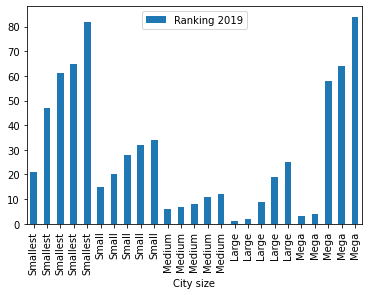

In [111]:
# Простая диаграмма топ-5 в каждой категории городов по населению.
top_5_concat.plot.bar(
    x = 'City size',
    y = 'Ranking 2019')

<ipython-input-112-99ad46f2a728>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(newlabels, rotation='vertical')


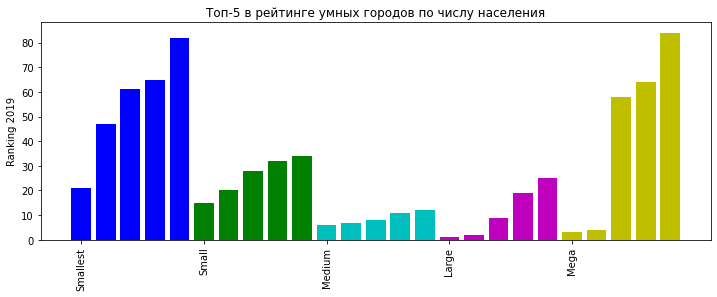

In [112]:
x = top_5_concat['City']
y = top_5_concat['Ranking 2019']

labels = top_5_concat['City size']
newlabels = []
oldlabels = labels.to_list()
for i in range(0, len(oldlabels)):
    if (i % 5) == 0:
        newlabels.append(oldlabels[i])
newlabels        

fig, ax = plt.subplots()

color_rectangle = ['b','b','b','b','b',
                  'g','g','g','g','g',
                  'c','c','c','c','c',
                  'm','m','m','m','m',
                  'y','y','y','y','y',
                  ]
ax.bar(x, y, color = color_rectangle)
ax.set_xticklabels(newlabels, rotation='vertical')
ax.set_xticks(np.arange(0, len(oldlabels), 5))
ax.set_ylabel('Ranking 2019')
ax.set_title('Топ-5 в рейтинге умных городов по числу населения')
fig.set_figwidth(12)    #  ширина и
fig.set_figheight(4)    #  высота "Figure"

plt.show()
# Видно, что лучшие представители - в средних и крупных городах. В небольших городах тоже достаточно неплохие лидеры. 
# В крайних случаях - маленьких и очень больших городах - лидерство - скорее исключительное свойство отдельного города. 

In [113]:
# Для графика рассеяния - показываем, что рейтинг не зависит от населения города
populations_in_rank_2019 = rank_2014_2019_outer.merge(populations_in_rank, on = ['City', 'Country']).loc[:,['City', 
                                                                        'Country', 'Population2021', 'Ranking 2019']]
populations_in_rank_2019

,City,Country,Population2021,Ranking 2019
0,London,United Kingdom,9425.622,1.0
1,New York City,United States,8230.290,2.0
2,Seoul,South Korea,9967.677,19.0
3,Paris,France,11078.546,3.0
4,Amsterdam,Netherlands,1157.519,8.0
...,...,...,...,...
172,Seattle,United States,776.555,53.0
173,Quebec City,Canada,831.776,89.0
174,Asuncion,Paraguay,3394.309,131.0
175,Skopje,North Macedonia,600.708,141.0


<AxesSubplot:xlabel='Population2021', ylabel='Ranking 2019'>

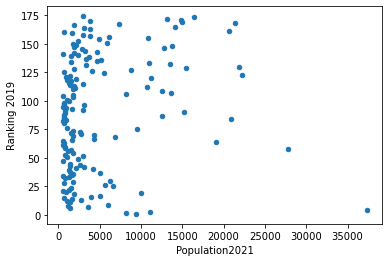

In [114]:
populations_in_rank_2019.plot.scatter(
    x = 'Population2021',
    y = 'Ranking 2019')

In [115]:
populations_in_rank_2019[['Population2021', 'Ranking 2019']].corr()
# На графике и по коэф-ту видно, что корреляции между размером города и его местом в рейтинге нет - на всей выборке
# Проверим на топ-50.

,Population2021,Ranking 2019
Population2021,1.000000,0.172986
Ranking 2019,0.172986,1.000000


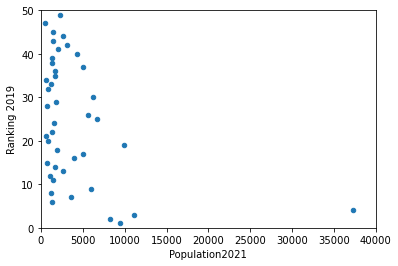

In [116]:
populations_in_rank_2019.plot.scatter(
    x = 'Population2021',
    y = 'Ranking 2019')
plt.axis((0,40000,0,50))
plt.show()
# У топ-50 тоже не видно зависимости населения от места в рейтинге. 
# Но когда выводим топ-5 для каждой категории, то видно, что средние и крупные города побеждают.

Проверим, есть ли зависимость между ВВП страны, ВВП на душу населения страны и рейтингом города в 2019 г.

In [117]:
GDP_per_capita = pd.read_excel('GDP_per_capita.xlsx', sheet_name='Prepared').filter(
    items =['Country', "GDP per capita in USD"])
GDP_in_rank_2019 = rank_2019.merge(GDP_per_capita, on = ['Country']).loc[
    :,['City', 'Country', "Ranking 2019", "CIMI 2019",  "GDP per capita in USD"]]
GDP_in_rank_2019

,City,Country,Ranking 2019,CIMI 2019,GDP per capita in USD
0,London,United Kingdom,1,100.00,40.285
1,Edinburgh,United Kingdom,47,63.94,40.285
2,Glasgow,United Kingdom,66,59.58,40.285
3,Manchester,United Kingdom,71,58.97,40.285
4,Birmingham,United Kingdom,73,58.63,40.285
...,...,...,...,...,...
168,Douala,Cameroon,170,22.58,1.499
169,Lagos,Nigeria,171,18.13,2.097
170,Lahore,Pakistan,172,13.76,1.194
171,Karachi,Pakistan,173,10.39,1.194


<AxesSubplot:xlabel='GDP per capita in USD', ylabel='Ranking 2019'>

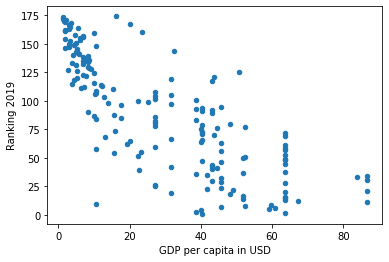

In [118]:
GDP_in_rank_2019.plot.scatter(
    x = 'GDP per capita in USD',
    y = 'Ranking 2019')

<AxesSubplot:xlabel='GDP per capita in USD', ylabel='CIMI 2019'>

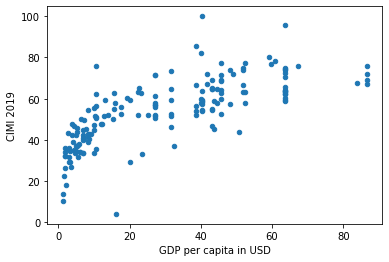

In [119]:
GDP_in_rank_2019.plot.scatter(
    x = 'GDP per capita in USD',
    y = 'CIMI 2019')

In [120]:
GDP_in_rank_2019[['GDP per capita in USD', 'Ranking 2019', 'CIMI 2019']].corr()
# Прослеживается связь между ВВП страны на душу населения и местом в рейтинге, индексом CIMI.
# Это ожидаемо, в т.ч. потому что ВВП входит к один из показателей для определения индекса CIMI, в блок Экономики, 
# который вносит существенный вклад в индекс, коэф-т корреляции общего индекса и индекса Экономики в 2019 г. - 0,72

,GDP per capita in USD,Ranking 2019,CIMI 2019
GDP per capita in USD,1.000000,-0.781160,0.734862
Ranking 2019,-0.781160,1.000000,-0.972428
CIMI 2019,0.734862,-0.972428,1.000000
